## 0. Identitas

Nama : Rafly Surya Wibowo

SCID: SC60524

Dataset : Heart Disease Dataset

Objective : 
- Mengetahui informasi-informasi yang bisa didapatkan sehingga dapat membantu dalam membuat langkah preventif untuk mengurangi dampak dari heart disease
- Memprediksi kemungkinan penyakit jantung pada pasien berdasarkan berbagai faktor
- Membangun model pembelajaran mesin yang dapat secara akurat memprediksi probabilitas seseorang terkena penyakit jantung

## 1. Menyiapkan Data

### Mengimpor Libraries

In [84]:
# Mengimpor librarry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from collections import Counter
from tabulate import tabulate

# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Training
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn import metrics
from sklearn.model_selection import learning_curve 
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.metrics import precision_recall_fscore_support

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Saving Model
import joblib
import json
import pickle


import warnings
warnings.filterwarnings("ignore")

### Mengimpor dataset

In [2]:
# Mengimpor dataset
df = pd.read_csv("https://raw.githubusercontent.com/54RaSuWi/dataset/main/heart.csv")

## 2. Pengenalan Data

### Atribut variabel

Penjelasan variabel

1. usia (age)
2. jenis kelamin (sex)
3. jenis nyeri dada (cp)
    - 0 : typical angina 
    - 1 : atypical angina
    - 2 : non-anginal pain
    - 3 : asymptomatic

    Sumber kategori: https://journal.nurulfikri.ac.id/index.php/jtt/article/view/30
4. tekanan darah pasien ketika dalam keadaan istirahat/diastolik dalam mm Hg (trestbps)
    - normal/tinggi : kurang dari 80 mm Hg
    - hipertensi 1 : 80 - 89 mm Hg
    - hipertensi 2 : 90 - 120 mm Hg
    - hipertensi 3 : lebih dari 120 mm Hg
    
    Sumber kategori: https://www.health.harvard.edu/heart-health/reading-the-new-blood-pressure-guidelines
5. kadar kolesterol dalam darah pasien dalam mg/dl (chol)
    - normal : kurang dari 200 mg/dl
    - berisiko : 200 - 240 mg/dl
    - tinggi : lebih dari 240 mg/dl

    Sumber kategori: https://www.elo.health/biomarkers/total-cholesterol-overview/500/
6. kadar gula darah pasien (fbs)
    - 0 : kadar gula darah pasien kurang dari sama dengan 120 mg/dl
    - 1 : kadar gula darah pasien lebih dari 120 mg/dl
7. kondisi EKG pasien ketika dalam keadaan istirahat (restecg)
    - 0 : keadaan normal
    - 1 : memiliki gelombang kelainan ST - T
    - 2 : menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes
8. detak jantung maksimum pasien (thalach)
    - kurang dari usia 20 maksimal 200 bpm
    - kurang dari usia 30 maksimal 190 bmp
    - kurang dari usia 35 maksimal 185 bpm
    - kurang dari usia 40 maksimal 180 bpm
    - kurang dari usia 45 maksimal 175 bpm
    - kurang dari usia 50 maksimal 170 bpm
    - kurang dari usia 55 maksimal 165 bpm
    - kurang dari usia 60 maksimal 160 bpm
    - kurang dari usia 65 maksimal 155 bpm
    - kurang dari usia 70 maksimal 150 bpm
    - kurang dari usia 75 maksimal 145 bpm
    - kurang dari usia 80 maksimal 140 bpm
    - kurang dari usia 85 maksimal 135 bpm
    - kurang dari usia 90 maksimal 130 bpm

    Sumber kategori: https://uihc.org/health-topics/target-heart-rate-exercise
9. keadaan dimana pasien akan mengalami nyeri dada apabila jantung bekerja lebih keras/sistolik (exang)
    - 0 : tidak nyeri
    - 1 : nyeri
10. depresi ST yang diakibatkan oleh latihan relatif dibandingkan saat istirahat (oldpeak)
11. Kemiringan segmen latihan puncak ST (slope)
    - 0 : upsloping
    - 1 : flat
    - 2 : downsloping
12. Banyaknya pembuluh darah besar yang terdeteksi fluoroskopi (ca)
13. Kelainan darah talasemia (thal)
    - 0 : normal
    - 1 : fixed defect (permanen)
    - 2 : reversal defect (sementara)
14. penyakit jantung pada pasien (target)
    - 0 : tidak pengidap
    - 1 : pengidap

## 3. Exploratory Data Analysis (EDA)

### Infromasi Dataset

In [3]:
# Menampilkan lima kolom pertama
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Menampilkan lima kolom terakhir
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# Menampilkan informasi mengenai dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Dalam dataset terdapat 1025 baris dan 14 kolom. Selain itu dapat diketahui bahwa tidak ada missing value tiap variabel.Semua variabel datanya berjenis numerik

In [6]:
# Menampilkan jumlah baris dan kolom
df.shape

(1025, 14)

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualisasi dan Memperbaiki Dataset

#### Histogram

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

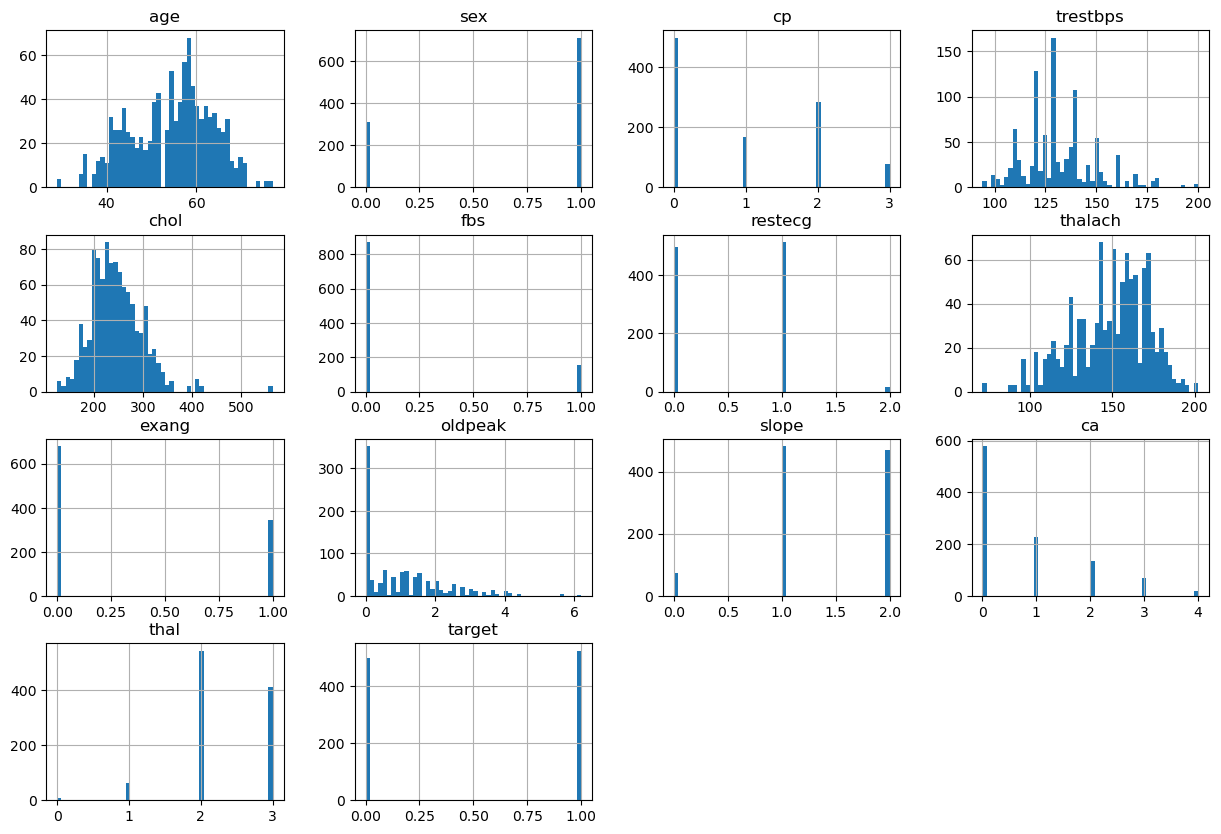

In [9]:
df.hist(bins=50,figsize=(15,10))

Dari visualisasi dengan menggunakan histogram di atas, dapat diketahui bahwa ternyata variabel sex, cp, fbs, restecg, exang, slope, ca, thal, dan target merupakan jenis variabel kategorikal. Sehingga semua variabel di atas akan ditransformasi jenis datanya.

Selain itu variabel numeriknya adalah age, trestbps, chol, thalach, dan oldpeak. Variabel oldpeak mempunyai distribusi condong ke kanan. Variabel trestbps, age, thalach mempunyai distribusi condong ke kiri. Variabel chol mempunyai distribusi normal meskipun terdapat sedikit outlier pada bagian kanan. 

#### Memperbaiki jenis data yang salah

In [10]:
# Memperbaiki jenis data yang salah
category_variable=["thal","ca","slope","exang","restecg","fbs","cp","sex"]
df[category_variable] = df[category_variable].astype(object)

In [11]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

Semua variabel telah ditransformasi sehingga ada 5 variabel numerik dan 8 variabel kategori

#### Mendeskripsikan variabel numerik

In [12]:
df.describe(exclude=object)

,age,trestbps,chol,thalach,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


1. Age merupakan variabel yang mempresentasikan usia pasien

    Dari tabel di atas diketahui bahwa umur pasien memiliki rentang usia 29 tahun sampai 77 tahun, dengan rata-rata usia pasien yang terbilang tua yaitu 54 tahun.


2. trestbps merupakan variabel yang mempresentasikan tekanan darah diastolik

    Diketahui bahwa tekanan darah diastolik pasien memiliki rentang tekanan antara 94 mm Hg sampai 200 mm Hg. Ternyata rata-rata pasien memiliki tekanan darah diastolik yang lebih dari 120 mm Hg yaitu berarti sebagian besar pasien termasuk ke dalam hipertensi 3.


3. chol merupakan variabel yang mempresentasikan kadar kolesterol dalam darah

    Dapat dilihat bahwa kadar kolesterol pasien memiliki rentang antara 126 hingga 564 mg/dl dan secara rata-rata pasien termasuk memiliki kolesterol tinggi yaitu lebih dari 200 mg/dl.


4. thalach merupakan variabel yang mempresentasikan detak jantung sistolik maksimum pasien

    Disimpulkan bahwa pasien memiliki rentang detak jantung antara 71 bpm sampai 202 bpm. Namun belum dapat diketahui apakah rata-rata pasien memiliki detak jantung sistolik yang normal, dikarenakan setiap usia memiliki detak jantung maksimum dan belum ada klasifikasi detak jantung sistolik maksimum pasien berdasarkan usia.


5. oldpeak merupakan variabel yang mempresentasikan perbandingan perubahan depresi ST saat sistolik dibandingkan saat diastolik

    Diketahui bahwa ada pasien yang tidak mengalami perubahan depresi ST dan ada pasien yang mengalami perubahan depresti ST sebanyak 6,2. Namun secara rata-rata, pasien mengalami perubahan depresi ST sebanyak 1,07.

#### Mendeskripsikan variabel kategorikal

In [13]:
df.describe(include=object)

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,1,0,2
freq,713,497,872,513,680,482,578,544


1. Sex merupakan jenis kelamin pasien

    Dapat dilihat bahwa ada dua jenis kelamin dan jenis kelamin pria yang dipresentasikan oleh angka 1 merupakan jenis kelamin pasien terbanyak yaitu sebanyak 713 pasien yang berjenis kelamin laki-laki.

2. cp merupakan variabel jenis nyeri dada yang diderita pasien

    Diketahui ternyata ada empat jenis nyeri dada yang diderita pasien. Jenis nyeri dada terbanyak adalah jenis nyeri typical angina yang merupakan jenis nyeri dada yang sering muncul ketika melakukan aktivitas yang berat atau saat mengalami tekanan emosional yaitu sebanyak 496 pasien yang mengalaminya. Jadi dapat dikatakan bahwa sebagian besar pasien mengalami nyeri dada saat sistolik. 

3. fbs merupakan variabel yang mewakili kadar gula darah pasien saat istirahat

    Didapatkan ada dua jenis kondisi kadar gula darah pasien saat istirahat. Jenis kondisi kadar gula darah pasien yang paling banyak adalah kadar gula darah yang masih di tahap wajar yaitu sebanayk 872 pasien memiliki kadar gula darah kurang dari 120 mg/dl.

4. restecg merupakan variabel kondisi EKG pasien saat istirahat

    Dilihat di tabel di atas bahwa ada dua tiga jenis kondisi EKG pasien. Sebagian besar  pasien yaitu sebanyak 513 memiliki kondisi gelombang kelainan ST - T pada EKGnya. 

5. exang merupakan variabel yang mempresentasikan keadaan dimana pasien akan mengalami nyeri dada apabila jantung bekerja lebih keras/sistolik

    Disimpulkan bahwa ada dua jenis keadaan yang dialami pasien saat mengalami nyeri dada apabila jantung bekerja lebih keras. Selain itu sebagian besar pasien yaitu sebanyak 680 pasien tidak mengalami nyeri dada saat jantung bekerja lebih keras.

6. slope merupakan kemiringan ST yang didapatkan setelah berolahraga

    Terdapat dua jenis slope dan kebanyakan pasien memiliki flat slope.

7. ca merupakan variabel yang mempresentasikan banyaknya pembuluh darah besar yang dimiliki oleh pasien

    Ada lima jenis pasien yang memiliki jumlah pembuluh darah besar yang berbeda dan sebagian besar pasien yaitu sebanyak 578 pasien tidak memiliki pembuluh darah besar.

8. thal merupakan variabel yang mewakili kondisi kelainan darah talasemia pada pasien

    Berdasarkan tabel yang telah dibuat ternyata diketahui bahwa terdapat empat jenis kondisi kelainan darah talasemia pada pasien. Berdasarkan informasi atribut data yang didapatkan hanya ada tiga jenis kondisi kelainan darah talasemia pada pasien. Sehingga hal tersebut menunjukan bahwa variabel thal mengalami kesalahan pengukuran. 

#### Membuat variabel baru berdasarkan jenis atribut variabel

In [14]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)

In [15]:
print(cat_col)

     sex cp fbs restecg exang slope ca thal
0      1  0   0       1     0     2  2    3
1      1  0   1       0     1     0  0    3
2      1  0   0       1     1     0  0    3
3      1  0   0       1     0     2  1    3
4      0  0   1       1     0     1  3    2
...   .. ..  ..     ...   ...   ... ..  ...
1020   1  1   0       1     1     2  0    2
1021   1  0   0       0     1     1  1    3
1022   1  0   0       0     1     1  1    2
1023   0  0   0       0     0     2  0    2
1024   1  0   0       1     0     1  1    3

[1025 rows x 8 columns]


#### Bar Chart (Categorical)

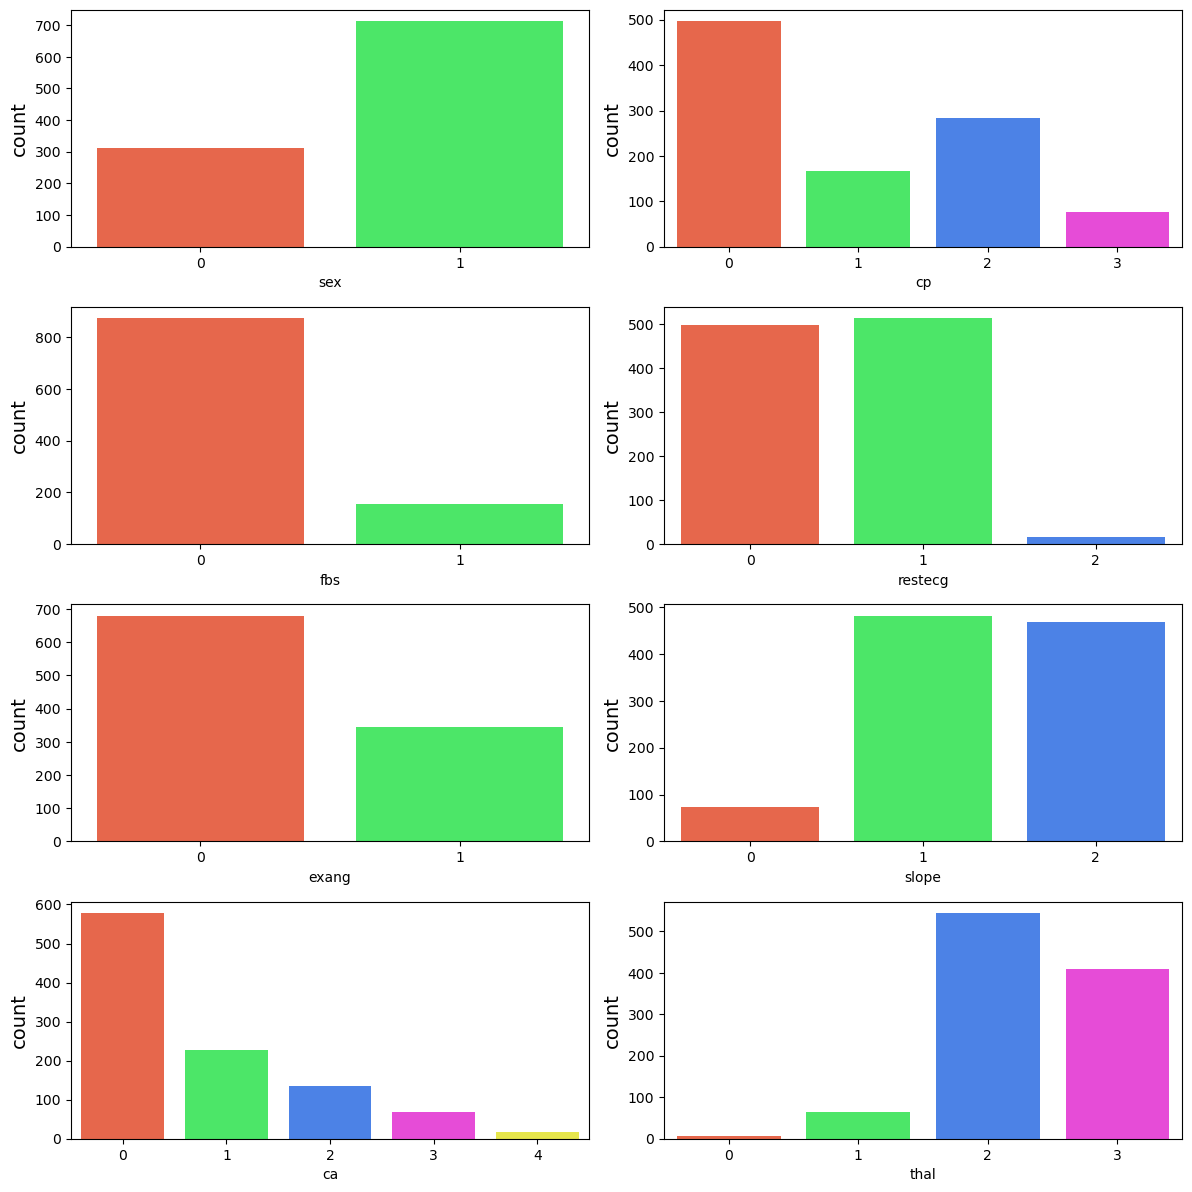

In [16]:
# Define custom colors for each category
custom_colors = ["#FF5733", "#33FF57", "#337AFF", "#FF33EC", "#FFFF33", "#33FFFF", "#333333", "#FF5733", "#33FF57", "#337AFF"]

plt.figure(figsize=(12, 12))
for index, column in enumerate(cat_col):
    plt.subplot(4, 2, index+1)
    ordered_categories = sorted(cat_col[column].unique())
    sns.countplot(data=cat_col, x=column ,palette=custom_colors, order=ordered_categories)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad=1.0)
plt.show()

Grafik di atas menunjukan bahwa kolom memiliki jenis kategorikal.

#### Boxplot (Numerical)

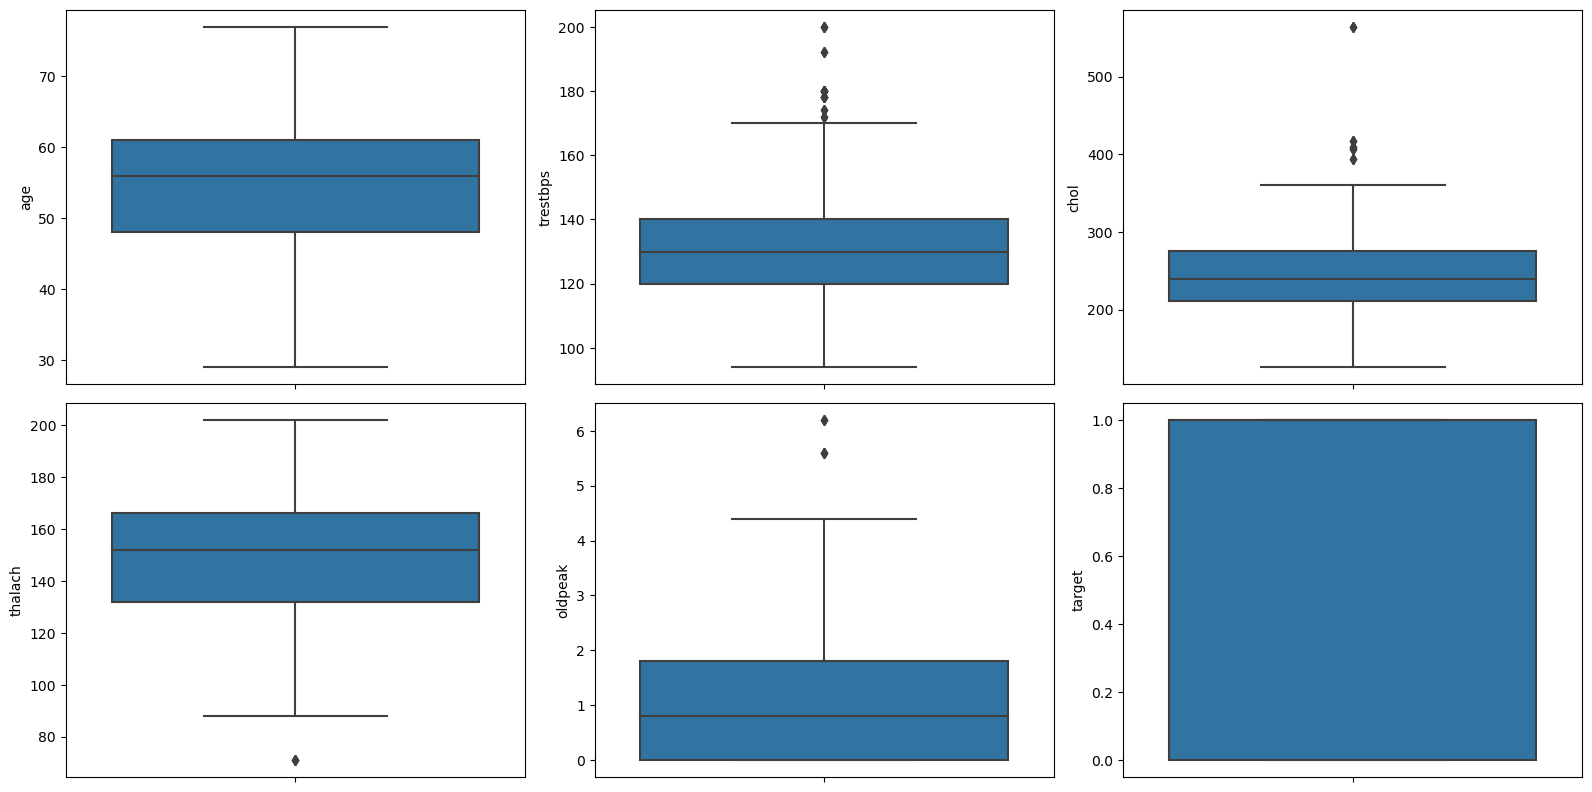

In [17]:
plt.figure(figsize=(16,8))
for index,column in enumerate(num_col):
    plt.subplot(2,3,index+1)
    sns.boxplot(data=num_col, y=column)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

Terdapat empat variabel yang mempunyai outlier, yaitu, trestbps, chol, thalach, oldpeak, target

#### Korelasi antar variabel

<Axes: >

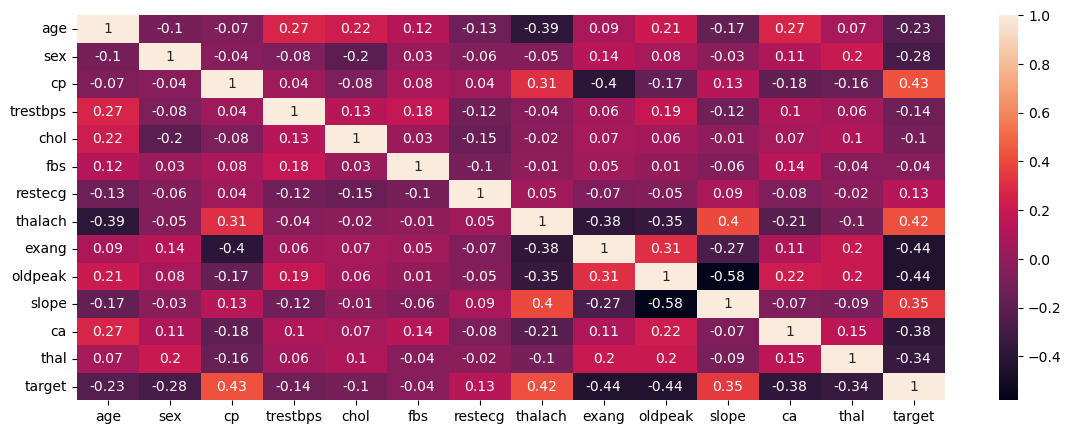

In [18]:
df_corr = df.corr()

plt.figure(figsize = (14,5))
sns.heatmap(round(df_corr,2),annot=True)

Dari tabel di atas diketahui bahwa terdapat empat variabel yang memiliki hubungan positif terhadap target yaitu cp, restecg, thalach, dan slope. Sedangkan terdapat sembilan variabel yang memiliki hubungan negatif terhadap target yaitu age, sex, trestbps, chol, bps, exang, oldpeak, ca, thal. 

## 4. Data Preprocessing

#### Imbalance Data

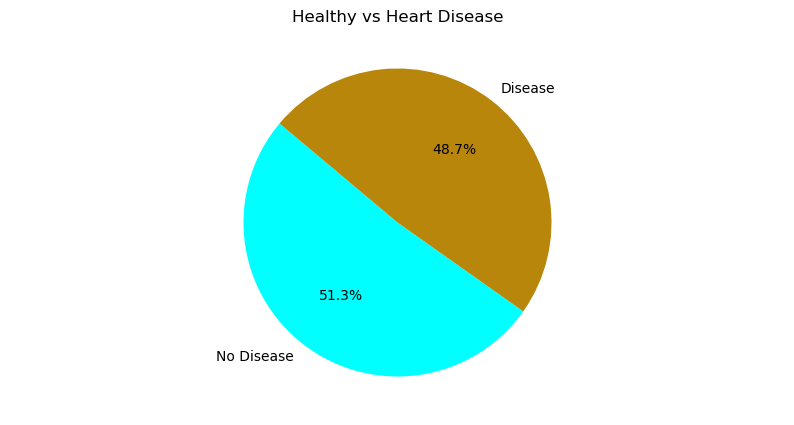

In [19]:
labels = ["No Disease", "Disease"]

# Calculate the counts of each category in the target column
health_condition = df["target"].value_counts().tolist()
values = [health_condition[0], health_condition[1]]

# Create a figure and a subplot with a size of 1x1
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle

# Plotting the pie chart in the middle
ax.pie(values, labels=labels, colors=["aqua", "darkgoldenrod"], autopct="%1.1f%%", startangle=140)
ax.set_title("Healthy vs Heart Disease")
plt.show()


Dapat dilihat pada pie chart di atas bahwa data yang digunakan cukup seimbang. 

### Missing Values

In [20]:
# Mendeteksi apakah ada missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak ada variabel yang mempunyai missing value

### Duplicate Values

In [21]:
# Mendeteksi jumlah duplicate values 
df.duplicated().sum()

723

ada sebanyak 723 data yang merupakan data duplikat, sehingga akan dilakukan penghapusan data duplikat tersebut 

In [22]:
# Menghilangkan duplicate values
df1 = df.drop_duplicates(inplace=False)

In [23]:
# Mendeteksi duplicate values pada dataframe baru
df1.duplicated().any()

False

In [24]:
# Menampikan jumlah baris dan kolom datafram baru
df1.shape

(302, 14)

In [25]:
# Menampikan informasi mengenai dataframe baru
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    object 
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 35.4+ KB


Saya menghapus data yang duplikat dikarenakan data duplikat dapat menyebabkan analisis menjadi tidak akurat dengan adanya data yang sama lebih dari satu.   

### Outlier

Dapat dilihat di boxplot bahwa ada empat variabel yang secara statistik mempunyai outlier. Berdasarkan pandangan pribadi saya, menghapus outlier tersebut tidak diperlukan dikarenakan tidak ada alasan statistik yang dapat menjustifikasi penghapusan outlier tersebut. Saya berpendapat bahwa outlier tersebut memang merupakan data ekstrim yang ada pada sedikit sampel. 

## Distribusi Penderita Penyakit Jantung

### 1. Distribusi Penderita Penyakit Jantung Berdasarkan Generasi

Di sini saya ingin melihat jenis generasi pasien mana yang rentan terhadap penyakti jantung. Jenis generasi dikelompokkan berdasarkan artikel https://www.beresfordresearch.com/age-range-by-generation/ yang membagi generasi manusia menjadi 7, namun saya menyatukan generasi boomer menjadi satu kelompok Pengelompokan distribusi pasien tersebut antara lain:
1. 12-27 merupakan gen Z
2. 28-43 merupakan gen millenials (gen Y)
3. 44-59 merupakan gen X
4. 60-78 merupakan generasi boomer

#### Mengelompokkan Usia menjadi Generasi

In [26]:
age_target = df1[["age", "target"]].copy()

# Menentukan batas rentang usia
bins = [12, 27, 43, 59, 78]

# Membuat kategori sesuai dengan batas rentang usia
labels = [0, 1, 2, 3]

# Menggunakan fungsi cut untuk membagi usia ke dalam kategori
age_target["age"] = pd.cut(age_target["age"], bins=bins, labels=labels, right=False)


print(age_target)

    age  target
0     2       0
1     2       0
2     3       0
3     3       0
4     3       0
..   ..     ...
723   3       1
733   2       1
739   2       0
843   3       0
878   2       0

[302 rows x 2 columns]


In [27]:
age_target["target"] = age_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
age_target.rename(columns={"age": "generasi", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result2 = age_target.value_counts().sort_index()
hasil2 = result2.reset_index(name="count")

# Displaying the result
print(tabulate(hasil2, headers="keys", tablefmt="pretty"))

+---+----------+------------------+-------+
|   | generasi | penyakit jantung | count |
+---+----------+------------------+-------+
| 0 |    1     |     pengidap     |  28   |
| 1 |    1     |  tidak pengidap  |   8   |
| 2 |    2     |     pengidap     |  93   |
| 3 |    2     |  tidak pengidap  |  69   |
| 4 |    3     |     pengidap     |  43   |
| 5 |    3     |  tidak pengidap  |  61   |
+---+----------+------------------+-------+


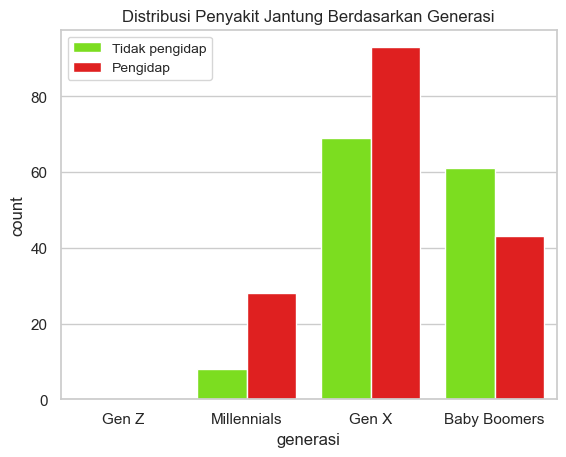

In [28]:
colors2 = ["lawngreen", "red"]
sns.set(style="whitegrid", color_codes=True)
fig2 = sns.countplot(x = "generasi", data = age_target, hue = "penyakit jantung",
                     palette=colors2)
fig2.set_xticklabels(labels=["Gen Z", "Millennials", "Gen X", "Baby Boomers"], rotation=0)
plt.legend(["Tidak pengidap", "Pengidap"], loc=2, prop={"size": 10})
plt.title("Distribusi Penyakit Jantung Berdasarkan Generasi");

Berdasarkan data di atas dapat disimpulkan bahwa Gen X merupakan generasi terbanyak yang terkena penyakit jantung dengan persentase risiko terkena penyakit jantung sebanyak 57,4%. Meskipun begitu gen millennials lah  kelompok usia yang paling berisiko terkena penyakit jantung dibandingkan lainnya yaitu sebesar 77,7% dari total sampel kelompok umur tersebut. Dibandingkan dua kelompok lainnya yang lebih muda, ternyata generasi boomer mempunyai risiko terkena penyakit jantung yang lebih rendah yaitu hanya sebesar 41,3%.

Berdasarkan artikel etactics.com yang menjelaskan mengenai perbedaan sikap tiap generasi terhadap kesehatan (link: https://etactics.com/blog/generations-in-healthcare), diketahui bahwa generasi baby boomers merupakan generasi yang paling perhatian terhadap kesehatan dibandingkan kedua generasi lainnya. Selain itu, semakin muda suatu generasi maka semakin rendah kepedulian generasi itu terhadap kondisi kesehatan. Sehingga hal tersebut berbanding lurus dengan temuan bahwa generasi boomers mempunyai kondisi kesehatan yang lebih baik dibandingkan kedua generasi lainnya.

### 2. Distribusi Penderita Penyakit Jantung Berdasarkan Jenis Kelamin

Di sini saya ingin melihat jenis kelamin mana yang lebih rentan terhadap penyakit jantung. Jenis kelamin dikelompokkan menjadi dua yaitu laki-laki dan wanita. Dimana 0 mempresentasikan wanita dan 1 mempresentasikan laki-laki.

In [29]:
gender_target = df1[["sex", "target"]].copy()
gender_target["sex"] = gender_target["sex"].replace({0: "wanita", 1: "pria"})
gender_target["target"] = gender_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
gender_target.rename(columns={"sex": "jenis kelamin", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result1 = gender_target.value_counts().sort_index()
hasil1 = result1.reset_index(name="count")

# Displaying the result
print(tabulate(hasil1, headers="keys", tablefmt="pretty"))

+---+---------------+------------------+-------+
|   | jenis kelamin | penyakit jantung | count |
+---+---------------+------------------+-------+
| 0 |     pria      |     pengidap     |  92   |
| 1 |     pria      |  tidak pengidap  |  114  |
| 2 |    wanita     |     pengidap     |  72   |
| 3 |    wanita     |  tidak pengidap  |  24   |
+---+---------------+------------------+-------+


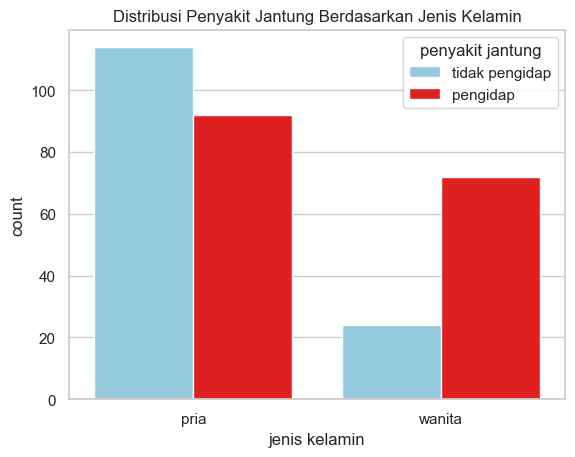

In [30]:
colors1 = ["skyblue", "red"]

fig1 = sns.countplot(x = "jenis kelamin", data = gender_target, hue = "penyakit jantung", palette=colors1)
plt.title("Distribusi Penyakit Jantung Berdasarkan Jenis Kelamin")
plt.show()

Dapat disimpulkan bahwa pria memiliki risiko lebih tinggi terkena penyakit jantung dibandingkan wanita. Hal tersebut dikarenakan sebanyak 64.375% pria terkena penyakit jantung, sedangkan sebanyak 57.143% wanita terkena penyakit jantung.

Dilansir dari prb.org bahwa pria rentan terhadap risiko kesehatan dibandingkan wanita dikarenakan kebanyakan pria cenderung merokok dibandingkan wanita. Meroko merupakan salah satu faktor terbesar yang menyebabkan penyakit jantung. Selain itu perbedaan biologi juga berpengaruh terhadap perbedaan imunitas antara wanita dan laki-laki. Ilmuwan percaya bahwa estrogen pada wanita dapat membantu memerangi penyakit jantung dan membantu dalam mengurangi kadar kolesterol berbahaya dalam sirkulasi darah. Wanita juga dianggap memiliki sistem kekebalan tubuh yang lebih kuat dibandingkan pria. 

sumber: https://www.prb.org/resources/around-the-globe-women-outlive-men/#:~:text=Biological%20differences%20also%20help%20to,stronger%20immune%20systems%20than%20men.

### 3. Distribusi Penderita Penyakit Jantung Berdasarkan Jenis Nyeri Dada

Di sini saya ingin melihat jenis nyeri dada yang dialami pasien mana yang lebih rentan terhadap penyakit jantung. Jenis nyeri dada pasien dikelompokkan menjadi empat yaitu 
1. typical angina: didefinisikan sebagai jenis nyeri dada yang muncul secara terpola. Disimbolkan 0
2. atypical angina: didefinisikan sebagai jenis nyeri dada yang muncul secara tidak terpola. Disimbolkan 1
3. non-anginal pain: didefinisikan sebagai jenis nyeri dada yang menyerupai gejala masalah jantung pada pasien yang tak memiliki penyakit jantung. Disimbolkan 2
4. asymptomatic: didefinisikan sebagai jenis nyeri dada yang tidak terdapat tanda atau gejala penyakit. Disimbolkan 3

Sumber: 
1. https://primayahospital.com/jantung/sakit-dada-belum-tentu-sakit-jantung-lalu-kenapa/
2. https://www.cancer.gov/publications/dictionaries/cancer-terms/def/asymptomatic

In [31]:
nyeri_target = df1[["cp", "target"]].copy()
nyeri_target["target"] = nyeri_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
nyeri_target.rename(columns={"cp": "jenis nyeri dada", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result8 = nyeri_target.value_counts().sort_index(ascending=False)
hasil8 = result8.reset_index(name="count")

# Displaying the result
print(tabulate(hasil8, headers="keys", tablefmt="pretty"))

+---+------------------+------------------+-------+
|   | jenis nyeri dada | penyakit jantung | count |
+---+------------------+------------------+-------+
| 0 |        3         |  tidak pengidap  |   7   |
| 1 |        3         |     pengidap     |  16   |
| 2 |        2         |  tidak pengidap  |  18   |
| 3 |        2         |     pengidap     |  68   |
| 4 |        1         |  tidak pengidap  |   9   |
| 5 |        1         |     pengidap     |  41   |
| 6 |        0         |  tidak pengidap  |  104  |
| 7 |        0         |     pengidap     |  39   |
+---+------------------+------------------+-------+


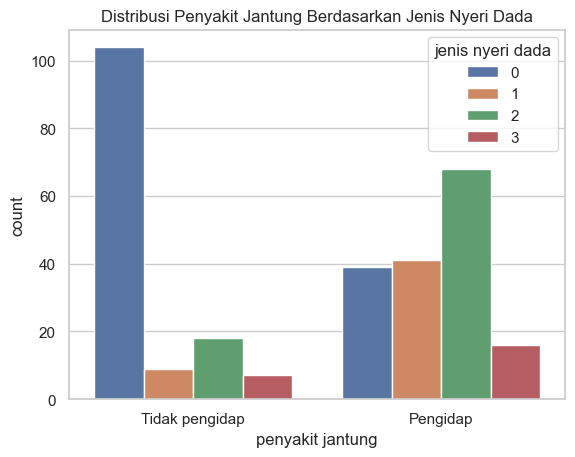

In [32]:
fig8 = sns.countplot(x = "penyakit jantung", data = nyeri_target, hue = "jenis nyeri dada")
fig8.set_xticklabels(labels=["Tidak pengidap", "Pengidap"], rotation=0)
plt.title("Distribusi Penyakit Jantung Berdasarkan Jenis Nyeri Dada");

Dari tabel di atas dapat diketahui bahwa pasien dengan jenis nyeri dada non-anginal merupakan pengidap penyakit jantung terbanyak yaitu sebanyak 68 pasien memiliki jenis nyeri dada ini. Sedangkan persentase pengidap penyakit jantung terbesar adalah jenis nyeri dada atypical angina yang mempunyai persentase sebanyak 82%. Typical angina dari total pasien yang mengalami jenis nyeri dada ini. Typical angina merupakan jenis nyeri dada yang paling tidak rentan terhadap penyakit jantung yaitu hanya sebanyak 27,27% dari total pasien yang mengalami jenis nyeri dada ini.

Berdasarkan hasil penemuan itu saya berasumsi bahwa pasien dengan jenis nyeri dada atypical angina rentan terhadap penyakit jantung dikarenakan atypical angina tidak memiliki gejala yang khas. Sehingga membuat hal ini sulit diidentifikasi dan akan cenderung diabaikan oleh pasien. Hal sama juga terjadi pada jenis nyeri dada non-anginal dan asymptomatic diaman gejala nyeri dada sulit diidentifikasi sehingga menyebabkan terlambatnya pencegahan terhadap perkembangan penyakit jantung. Hal itu berbeda dengan typical angina yang memiliki gejala terpola, sehingga pasien dapat mengidentifikasi yang kemudian hal tersebut akan menjadi perhatian pasien dengan jenis nyeri dada ini dan nantinya dapat mencegah berkembangnya penyakit jantung dari awal.

### 4. Distribusi Penderita Penyakit Jantung Berdasarkan Kondisi Tekanan Darah Diastolik

Bagian keempat ini saya ingin mengetahui risiko terkena penyakit jantung terhadap tekanan darah pasien ketika dalam keadaan istirahat atau diastolik. Tekanan darah pasien saat diastolik saya kelompokkan menurut artikel dari harvard (https://www.health.harvard.edu/heart-health/reading-the-new-blood-pressure-guidelines). Pengelompokkan tersebut antar alain 
1. normal/tinggi: didefinisikan tekanan darah kurang dari 80 mm Hg yang disimbolkan oleh 0
2. hipertensi 1: didefinisikan tekanan darah antara 80 mm Hg sampai 89 mm Hg yang disimbolkan oleh 1
3. hipertensi 2: didefisinikan tekanan darah antara 90 mm Hg sampai 120 mm Hg yang disimbolkan oleh 2
4. hipertensi 3: didefisinikan tekanan darahlebih dari 120 mm Hg yang disimbolkan oleh 3

In [33]:
diastolik_target = df1[["trestbps", "target"]].copy()

# Menentukan batas rentang tekanan darah
bins = [0, 80, 89, 120, 200]

# Membuat kategori sesuai dengan batas rentang tekanan darah
labels = [0, 1, 2, 3]

# Menggunakan fungsi cut untuk membagi tekanan darah ke dalam kategori
diastolik_target["trestbps"] = pd.cut(diastolik_target["trestbps"], bins=bins, labels=labels, right=False)

print(diastolik_target)

    trestbps  target
0          3       0
1          3       0
2          3       0
3          3       0
4          3       0
..       ...     ...
723        3       1
733        2       1
739        3       0
843        3       0
878        3       0

[302 rows x 2 columns]


In [34]:
diastolik_target["target"] = diastolik_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
diastolik_target.rename(columns={"trestbps":"tekanan darah diastolik", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result3 = diastolik_target.value_counts().sort_index(ascending=True)
hasil3 = result3.reset_index(name="Count")

# Displaying the result
print(tabulate(hasil3, headers="keys", tablefmt="pretty"))

+---+-------------------------+------------------+-------+
|   | tekanan darah diastolik | penyakit jantung | Count |
+---+-------------------------+------------------+-------+
| 0 |            2            |     pengidap     |  37   |
| 1 |            2            |  tidak pengidap  |  23   |
| 2 |            3            |     pengidap     |  127  |
| 3 |            3            |  tidak pengidap  |  114  |
+---+-------------------------+------------------+-------+


Text(0.5, 1.0, 'Distribusi Penyakit Jantung Berdasarkan Kondisi Tekanan Darah Diastolik')

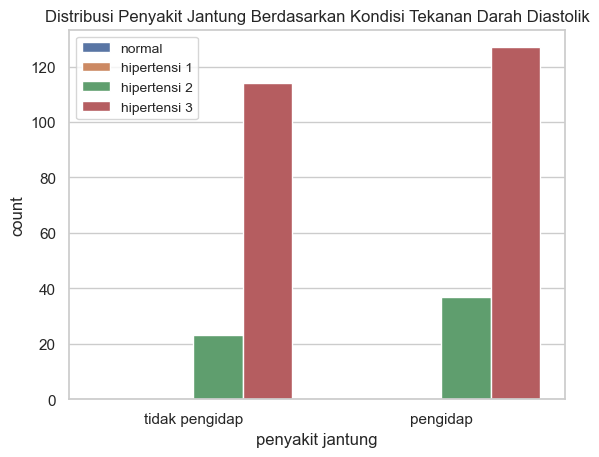

In [35]:
fig3 = sns.countplot(hue = "tekanan darah diastolik", data = diastolik_target, x = "penyakit jantung")
plt.legend(["normal", "hipertensi 1", "hipertensi 2", "hipertensi 3"], fontsize="small")
plt.title("Distribusi Penyakit Jantung Berdasarkan Kondisi Tekanan Darah Diastolik")

Berdasarkan tabel di atas diketahui bahwa pasien yang memiliki hipertensi 2 memiliki risiko terkena penyakit jantung yang paling tinggi dibandingkan ketiga jenis tekanan darah pasien lainnya yaitu sebanyak 61,67%. Meskipun begitu ternyata tekanan darah berjenis hipertensi 3 memiliki jumlah pasien yang paling banyak dibandingkan ketiga jenis tekanan darah lainnya yaitu sebanyak 127 pasien.

Penyakit jantung hanya terdapat pada pasien yang memiliki tekanan darah yang sangat tinggi yaitu lebih dari 90 mm Hg yang dinamakan hipertensi. Hal tersebut sesuai dengan fakta dari salah satu artikel cdc (center for disease control and prevention) yang menyebutkan bahwa tekanan darah tinggi dapat merusak arteri karena membuatnya kurang elastis, sehingga menurunkan aliran darah dan oksigen ke jantung dan menyebabkan penyakit jantung.

Sumber: https://www.cdc.gov/bloodpressure/about.htm#:~:text=serious%20health%20problems.-,Heart%20Attack%20and%20Heart%20Disease,Chest%20pain%2C%20also%20called%20angina.

### 5. Distribusi Penderita Penyakit Jantung Berdasarkan Kadar Kolesterol Dalam Darah 

Pada bagian kelima saya ingin menemukan pengaruh kadar kolesterol dalam darah pasien terhadap risiko pasien terkena penyakit jantung. Jenis kadar kolesterol dibagi menjadi tiga berdasarkan artikel dari elo.health (https://www.elo.health/biomarkers/total-cholesterol-overview/500/). Pengelompokkan kadar kolesterol itu antara lain:
1. normal: didefinisikan kadar kolesterol kurang dari 200 mg/dl disimbolkan oleh 0
2. berisiko: didefinisikan kadar kolesterol antara 200 mg/dl sampai 240 mg/dl disimbolkan oleh 1
3. tinggi: didefinisikan kadar kolesterol lebih dari 240 mg/dl disimbolkan oleh 2

In [36]:
kolesterol_target = df1[["chol","target"]].copy()

# Menentukan batas rentang tekanan darah
bins = [0, 200, 240, 600]

# Membuat kategori sesuai dengan batas rentang tekanan darah
labels = [0, 1, 2]

# Menggunakan fungsi cut untuk membagi tekanan darah ke dalam kategori
kolesterol_target["chol"] = pd.cut(kolesterol_target["chol"], bins=bins, labels=labels, right=False)

print(kolesterol_target)

    chol  target
0      1       0
1      1       0
2      0       0
3      1       0
4      2       0
..   ...     ...
723    1       1
733    0       1
739    2       0
843    2       0
878    0       0

[302 rows x 2 columns]


In [37]:
kolesterol_target["target"] = kolesterol_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
kolesterol_target.rename(columns={"chol": "kadar kolesterol", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result4 = kolesterol_target.value_counts().sort_index()
hasil4 = result4.reset_index(name="count")

# Displaying the result
print(tabulate(hasil4, headers="keys", tablefmt="pretty"))

+---+------------------+------------------+-------+
|   | kadar kolesterol | penyakit jantung | count |
+---+------------------+------------------+-------+
| 0 |        0         |     pengidap     |  29   |
| 1 |        0         |  tidak pengidap  |  20   |
| 2 |        1         |     pengidap     |  59   |
| 3 |        1         |  tidak pengidap  |  39   |
| 4 |        2         |     pengidap     |  76   |
| 5 |        2         |  tidak pengidap  |  79   |
+---+------------------+------------------+-------+


Text(0.5, 1.0, 'Distribusi Penyakit Jantung Berdasarkan Kadar Kolesterol')

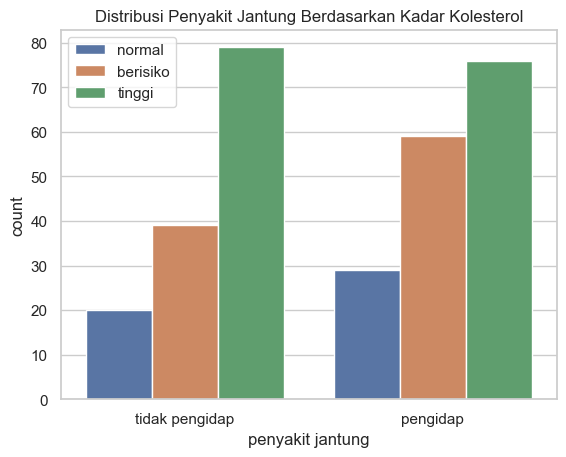

In [38]:
fig4 = sns.countplot(hue = "kadar kolesterol", data = kolesterol_target, x = "penyakit jantung")
plt.legend(["normal", "berisiko", "tinggi"])
plt.title("Distribusi Penyakit Jantung Berdasarkan Kadar Kolesterol")

Dari tabel dapat diketahui bahwa pasien yang memiliki kadar kolesterol dengan kondisi "berisiko" memiliki risiko terkena penyakit jantung yang lebih tinggi dibandingkan dua lainnya yaitu sebesar 60,2%. Meskipun begitu pasien yang memiliki kolesterol rendah juga hampir memiliki risiko terkena penyakit jantung yang sama besarnya dengan pasien yang memiliki kolesterol yang berisiko yaitu sebanyak 59,18%. Meskipun memiliki persentase risiko terkena penyakit jantung yang lebih rendah dibandingkan dua lainnya yaitu sebanyak 49,03%, namun pasien dengan kadar kolesterol tinggi merupakan pasien yang terkena penyakit jantung terbanyak dibandingkan dua lainnya. 

Penemuan ini sungguh menarik dikarenakan menurut artikel mayo clinic (https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=Your%20body%20needs%20cholesterol%20to,to%20flow%20through%20your%20arteries.) disebutkan bahwa kadar kolesterol yang tinggi dapat meningkatkan risiko penyakit jantung. Sementara itu hasil membuktikan bahwa pasien dengan kolesterol tinggi memiliki persentase risiko terkena penyakit jantung yang lebih rendah dibandingkan pasien dengan kolesterol rendah dan berisiko. Saya berasumsi bahwa hal ini dikarenakan ada faktor-faktor di luar penelitian yang lebih berpengaruh terhadap risiko pasien terkena penyakit jantung. Seperti pada artikel milik cleveland clinic (https://my.clevelandclinic.org/health/articles/11918-cholesterol-high-cholesterol-diseases) yang menyebuatkan bahwa tekanan darah tinggi dan kolesterol tinggi adalah dua penyebab terbesar penyakit jantung. Dimana tekanan darah tinggi bukan termasuk variabel yang ada di bagian ini. 

### 6. Distribusi Penderita Penyakit Jantung Berdasarkan Kadar Gula Darah 

Di bagian ini saya ingin mengetahui apakah ada kaitan kadar gula darah pasien dengan risiko terkena penyakit jantung pada seseorang. Jenis kadar gula dibedakan menjadi dua yaitu:
1. Kadar gula darah pasien kurang dari sama dengan 120 mg/dl yang disimbolkan oleh 0
2. Kadar gula darah pasien lebih dari 120 mg/dl yang disimbolkan oleh 1

In [39]:
gula_target = df1[["fbs", "target"]].copy()
gula_target["fbs"] = gula_target["fbs"].replace({0: "FBS <= 120 mg/dl", 1: "FBS > 120 mg/dl"})
gula_target["target"] = gula_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
gula_target.rename(columns={"fbs": "kadar gula darah", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result5 = gula_target.value_counts().sort_index()
hasil5 = result5.reset_index(name="count")

# Displaying the result
print(tabulate(hasil5, headers="keys", tablefmt="pretty"))

+---+------------------+------------------+-------+
|   | kadar gula darah | penyakit jantung | count |
+---+------------------+------------------+-------+
| 0 | FBS <= 120 mg/dl |     pengidap     |  141  |
| 1 | FBS <= 120 mg/dl |  tidak pengidap  |  116  |
| 2 | FBS > 120 mg/dl  |     pengidap     |  23   |
| 3 | FBS > 120 mg/dl  |  tidak pengidap  |  22   |
+---+------------------+------------------+-------+


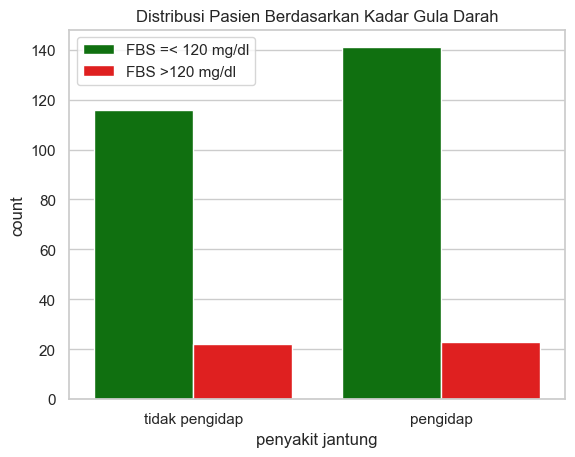

In [40]:
colors5 = {
    "FBS <= 120 mg/dl" : "green",
    "FBS > 120 mg/dl" : "red"
}

fig5 = sns.countplot(x = "penyakit jantung", data = gula_target, hue = "kadar gula darah", palette=colors5)
plt.legend(["FBS =< 120 mg/dl", "FBS >120 mg/dl"])
plt.title("Distribusi Pasien Berdasarkan Kadar Gula Darah");

Diketahui dari hasil bahwa pasien yang memiliki kadar gula yang normal yaitu kurang dari sama dengan 120 mg/dl memiliki risiko terkena penyakit jantung yang tinggi yaitu sebanyak 54,86% dengan total pasien sebanyak 141 pasien.

Hasil tersebut berbanding terbalik dari artikel milik NIH (national institute of diabetes and digestive and kidney diseases) yang menerangkan bahwa gula darah tinggi berpotensi merusak pembuluh darah dan saraf yang mengontrol jantung dan pembuluh darah Anda. Namun menurut artikel NIH lainnya rendahnya kadar gula darah dapat menyebabkan hipoglikemia yaitu gangguan kesehatan yang terjadi ketika kadar gula di dalam darah berada di bawah kadar normal. Hipoglikemia yang berat dapat berpotensi memicu dampak buruk ke jantung. 

Sumber: https://www.niddk.nih.gov/health-information/diabetes/overview/preventing-problems/heart-disease-stroke#:~:text=High%20blood%20glucose%20from%20diabetes,can%20lead%20to%20heart%20disease.&text=People%20with%20diabetes%20tend%20to,age%20than%20people%20without%20diabetes.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3263176 #:~:text=Severe%20hypoglycemia%20can%20precipitate%20adverse in%20intravascular%20coagulability%20and%20viscosity.

### 7. Distribusi Penderita Penyakit Jantung Berdasarkan Kondisi EKG Pasien Saat Diastolik

In [41]:
EKG_target = df1[["restecg", "target"]].copy()
EKG_target["restecg"] = EKG_target["restecg"].replace({0: "normal", 1: "gelombang kelainan ST-T", 
                                                     2: "hipertrofi vertikel kiri"})
EKG_target["target"] = EKG_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
EKG_target.rename(columns={"restecg": "kondisi EKG saat diastolik", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result11 = EKG_target.value_counts().sort_index(ascending=False)
hasil11 = result11.reset_index(name="count")

# Displaying the result
print(tabulate(hasil11, headers="keys", tablefmt="pretty"))

+---+----------------------------+------------------+-------+
|   | kondisi EKG saat diastolik | penyakit jantung | count |
+---+----------------------------+------------------+-------+
| 0 |           normal           |  tidak pengidap  |  79   |
| 1 |           normal           |     pengidap     |  68   |
| 2 |  hipertrofi vertikel kiri  |  tidak pengidap  |   3   |
| 3 |  hipertrofi vertikel kiri  |     pengidap     |   1   |
| 4 |  gelombang kelainan ST-T   |  tidak pengidap  |  56   |
| 5 |  gelombang kelainan ST-T   |     pengidap     |  95   |
+---+----------------------------+------------------+-------+


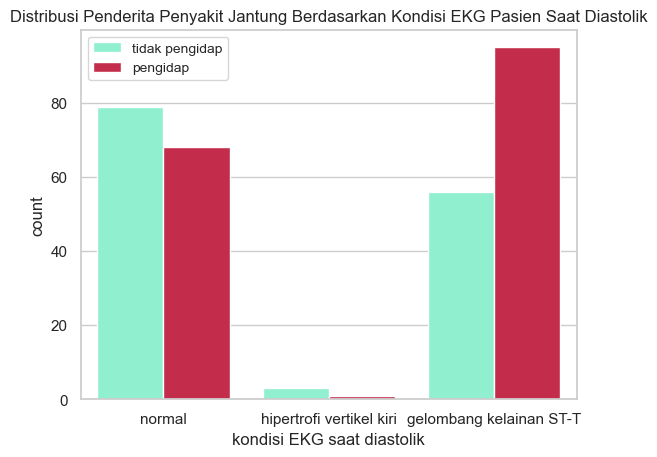

In [42]:
colors11 = ["aquamarine", "crimson"]

fig11 = sns.countplot(hue = "penyakit jantung", data = EKG_target, x = "kondisi EKG saat diastolik", 
                      order=["normal", "hipertrofi vertikel kiri", "gelombang kelainan ST-T"],
                      palette=colors11)
# fig8.set_xticklabels(labels=["Tidak pengidap", "Pengidap"], rotation=0)
plt.title("Distribusi Penderita Penyakit Jantung Berdasarkan Kondisi EKG Pasien Saat Diastolik")
plt.legend(fontsize="small")

Dari hasil yang didapat diketahui bahwa ternyata pasien yang memiliki gelombang EKG berjenis 2 yaitu menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri memiliki risiko terkena penyakit jantung yang lebih tinggi dibandingkan pasien yang memiliki gelombang EKG berjenis 0 dan 1 dengan persentase risiko sebanyak 62,9%.

Menurut artikel dari alodokter, hipertrofi ventrikel kiri dapat menyebabkan jaringan otot jantung menjadi tidak elastis. Hal ini menyebabkan penurunan fungsi jantung dalam memompa darah sehingga aliran darah ke seluruh tubuh terganggu. Hipertrofi ventrikel kiri juga dapat mengubah struktur dan kerja jantung. Kondisi ini juga dapat menyebabkan jantung melemah, mengeras, dan menurunkan fungsi jantung dalam memompa darah.

Sumber: https://www.alodokter.com/hipertrofi-ventrikel-kiri#:~:text=Hipertrofi%20ventrikel%20kiri%20adalah%20pembesaran,kaya%20oksigen%20sebelum%20meninggalkan%20jantung.

### 8. Distribusi Penderita Penyakit Jantung Berdasarkan Detak Jantung Maksimum Pasien

Pada bagian ke tujuh ini saya ingin mengetahui hubungan antara detak jantung maksimum pasien terhadap risiko terkena penyakit jantung.

In [43]:
beat_target = df1[["thalach", "target"]].copy()
beat_target["thalach"] = beat_target["thalach"]
beat_target["target"] = beat_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
beat_target.rename(columns={"thalach": "detak jantung maksimum", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result9 = beat_target.value_counts().sort_index()
hasil9 = result9.reset_index(name="count")

# Displaying the result
print(tabulate(hasil9, headers="keys", tablefmt="pretty"))

+-----+------------------------+------------------+-------+
|     | detak jantung maksimum | penyakit jantung | count |
+-----+------------------------+------------------+-------+
|  0  |           71           |  tidak pengidap  |   1   |
|  1  |           88           |  tidak pengidap  |   1   |
|  2  |           90           |  tidak pengidap  |   1   |
|  3  |           95           |  tidak pengidap  |   1   |
|  4  |           96           |     pengidap     |   1   |
|  5  |           96           |  tidak pengidap  |   1   |
|  6  |           97           |  tidak pengidap  |   1   |
|  7  |           99           |  tidak pengidap  |   1   |
|  8  |          103           |  tidak pengidap  |   2   |
|  9  |          105           |     pengidap     |   1   |
| 10  |          105           |  tidak pengidap  |   2   |
| 11  |          106           |  tidak pengidap  |   1   |
| 12  |          108           |  tidak pengidap  |   2   |
| 13  |          109           |  tidak 

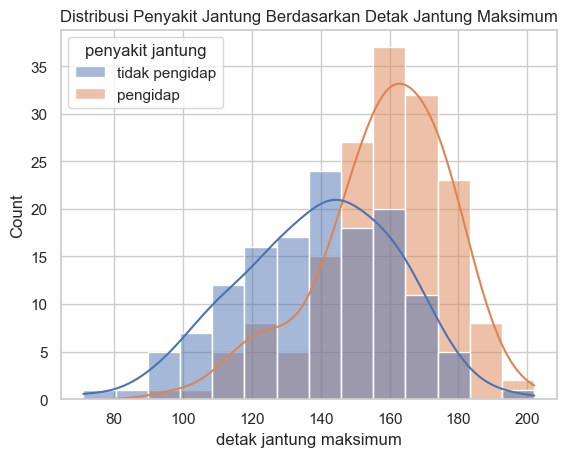

In [44]:
fig9 = sns.histplot(x = "detak jantung maksimum", data = beat_target, hue = "penyakit jantung", kde=True)
# fig9.set_xticklabels(labels=["Tidak pengidap", "Pengidap"], rotation=0)
plt.title("Distribusi Penyakit Jantung Berdasarkan Detak Jantung Maksimum");

Dari grafik di atas dapat disimpulkan bahwa semakin tinggi detak jantung maksimum pasien maka akan semakin tinggi risiko tekan penyakit jantung. Saya berasumsi bahwa pasien tersebut memiliki detak jantung yang melebihi detak jantung maksimum pasien normal. Sehingga dari hal tersebut saya menyimpulkan bahwa pasien dari sampel kebanyakan mempunyai detak jantung yang tidak normal. Untuk detak jantung maksimum itu beragam untuk setiap batasan umur dan hal itu dapat dilihat pada artikel milik uihc.org

Sumber: https://uihc.org/health-topics/target-heart-rate-exercise

### 9. Distribusi Penderita Penyakit Jantung Berdasarkan Nyeri Dada Saat Sistolik

Pada bagian kedelapan saya ingin mengetahui distribusi keadaan dimana pasien akan mengalami nyeri dada apabila jantung bekerja lebih keras atau saat sitolik terhadap risiko terkena penyakit jantung.
1. Jika pasien merasa tidak nyeri maka hal itu disimbolkan oleh angka 0
2. Jika pasien merasa nyeri maka hal itu disimbilkan oleh angka 1

In [45]:
sistolik_target = df1[["exang", "target"]].copy()
sistolik_target["exang"] = sistolik_target["exang"].replace({0: "tidak nyeri", 1: "nyeri"})
sistolik_target["target"] = sistolik_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
sistolik_target.rename(columns={"exang": "nyeri dada saat sistolik", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result7 = sistolik_target.value_counts().sort_index(ascending=False)
hasil7 = result7.reset_index(name="count")

# Displaying the result
print(tabulate(hasil7, headers="keys", tablefmt="pretty"))

+---+--------------------------+------------------+-------+
|   | nyeri dada saat sistolik | penyakit jantung | count |
+---+--------------------------+------------------+-------+
| 0 |       tidak nyeri        |  tidak pengidap  |  62   |
| 1 |       tidak nyeri        |     pengidap     |  141  |
| 2 |          nyeri           |  tidak pengidap  |  76   |
| 3 |          nyeri           |     pengidap     |  23   |
+---+--------------------------+------------------+-------+


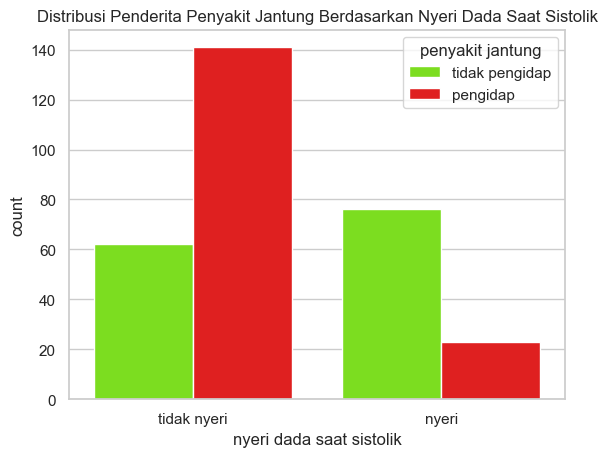

In [46]:
colors7 = ["lawngreen", "red"]
fig7 = sns.countplot(hue = "penyakit jantung", data = sistolik_target, x = "nyeri dada saat sistolik", 
                     palette=colors7)
# fig7.set_xticklabels(labels=["Tidak pengidap", "Pengidap"], rotation=0)
plt.title("Distribusi Penderita Penyakit Jantung Berdasarkan Nyeri Dada Saat Sistolik");

Dari hasil ditemukan bahwa pasien yang tidak merasakan nyeri saat jantung memompa lebih keras atau saat sistolik adalah pasien yang memiliki risiko terkena penyakit jantung terbanyak, yaitu sebanyak 69,46% pasien yang tidak merasakan nyeri mengidap penyakit jantung. 

Hal penemuan ini memiliki alasan yang sama dengan penemuan pada bagian 3 yaitu "Distribusi Penderita Penyakit Jantung Berdasarkan Jenis Nyeri Dada" yaitu pasien yang tidak mengalami nyeri dada akan sulit mengidentifikasi apakah pasien tersebut memiliki atau berpotensi mengidap penyakit jantung atau tidak. 

### 10. Distribusi Penderita Penyakit Jantung Berdasarkan Kemiringan Slope ST setelah Sistolik

Pada bagian ini ingin dicari distribusi kemiringan segmen latihan puncak ST (slope) setelah sistolik atau saat jantung bekerja keras terhadap risiko penyakit jantung. Kemiringan ST dibedakan menjadi tiga jenis yaitu:
1. upsloping yang disimbolkan oleh 0
2. flat yang disimbolkan oleh 1
3. downsloping yang disimbolkan oleh 2

In [47]:
slope_target = df1[["slope", "target"]].copy()
slope_target["slope"] = slope_target["slope"].replace({0: "upsloping", 1: "flat", 2: "downsloping"})
slope_target["target"] = slope_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
slope_target.rename(columns={"slope": "kemiringan ST saat sistolik", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result10 = slope_target.value_counts().sort_index(ascending=False)
hasil10 = result10.reset_index(name="count")

# Displaying the result
print(tabulate(hasil10, headers="keys", tablefmt="pretty"))

+---+-----------------------------+------------------+-------+
|   | kemiringan ST saat sistolik | penyakit jantung | count |
+---+-----------------------------+------------------+-------+
| 0 |          upsloping          |  tidak pengidap  |  12   |
| 1 |          upsloping          |     pengidap     |   9   |
| 2 |            flat             |  tidak pengidap  |  91   |
| 3 |            flat             |     pengidap     |  49   |
| 4 |         downsloping         |  tidak pengidap  |  35   |
| 5 |         downsloping         |     pengidap     |  106  |
+---+-----------------------------+------------------+-------+


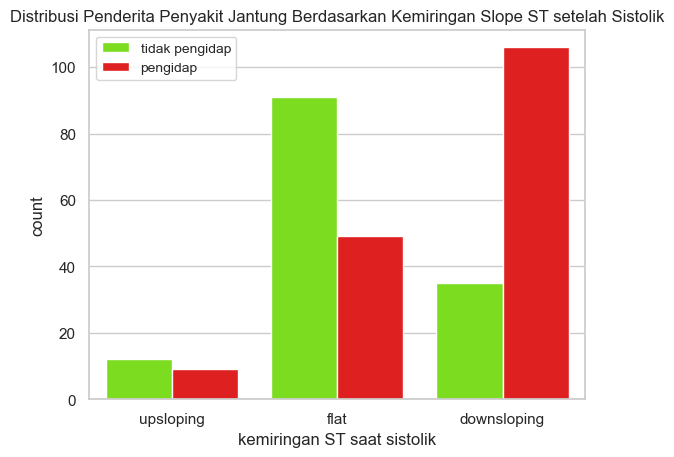

In [48]:
colors8 = ["lawngreen", "red"]

fig8 = sns.countplot(hue = "penyakit jantung", data = slope_target, x = "kemiringan ST saat sistolik",
                      order=["upsloping", "flat", "downsloping"], palette=colors8)
# fig8.set_xticklabels(labels=["Tidak pengidap", "Pengidap"], rotation=0)
plt.title("Distribusi Penderita Penyakit Jantung Berdasarkan Kemiringan Slope ST setelah Sistolik")
plt.legend(fontsize="small")

Berdasarkan penemuan yang di dapat, ditemukan bahwa pasien dengan kemiringan ST jenis downsloping memiliki risiko terkena penyakit jantung yang lebih tinggi dibandingkan pasien yang memiliki kemiringan ST jenis upsloping dan flat. Pasien dengan kemiringan ST jenis downsloping memiliki risiko terkena penyakit jantung sebanyak 64,75,18%, sedangkan pasien dengan kemiringan ST jenis upsloping dan flat masing-masing memiliki risiko sebanyak 42,86% dan 35%.

Dikutip dari artikel yang berjudul "The Value of Upsloping ST Depression in Diagnosing Myocardial Ischemia" bahwa kemiringan ST downsloping menunjukan peningkatan atau perluasan iskemia (keadaan di mana aliran darah ke bagian tubuh tertentu berkurang). Sehingga suplai aliran darah yang berkurang karena iskemia tersebut menyebabkan kerusakan pada sel-sel otot jantung.  

Sumber: 
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6932726/#:~:text=Thus%2C%20a%20downsloping%20ST%20depression,and%2041.2%25%20single%20vessel%20disease.
- https://www.heart.org/en/health-topics/heart-attack/about-heart-attacks#:~:text=Cardiac%20ischemia%20is%20decreased%20blood,or%20myocardial%20infarction%20(MI).



### 11. Distribusi Penderita Penyakit Jantung Berdasarkan Perubahan Depresi ST Saat Sistolik Dibanding Saat Diastolik

In [49]:
oldpeak_target = df1[["oldpeak", "target"]].copy()
oldpeak_target["oldpeak"] = oldpeak_target["oldpeak"]
oldpeak_target["target"] = oldpeak_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
oldpeak_target.rename(columns={"oldpeak": "perubahan depresi ST", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result12 = oldpeak_target.value_counts().sort_index()
hasil12 = result12.reset_index(name="count")

# Displaying the result
print(tabulate(hasil12, headers="keys", tablefmt="pretty"))

+----+----------------------+------------------+-------+
|    | perubahan depresi ST | penyakit jantung | count |
+----+----------------------+------------------+-------+
| 0  |         0.0          |     pengidap     |  73   |
| 1  |         0.0          |  tidak pengidap  |  25   |
| 2  |         0.1          |     pengidap     |   4   |
| 3  |         0.1          |  tidak pengidap  |   3   |
| 4  |         0.2          |     pengidap     |   9   |
| 5  |         0.2          |  tidak pengidap  |   3   |
| 6  |         0.3          |     pengidap     |   2   |
| 7  |         0.3          |  tidak pengidap  |   1   |
| 8  |         0.4          |     pengidap     |   8   |
| 9  |         0.4          |  tidak pengidap  |   1   |
| 10 |         0.5          |     pengidap     |   4   |
| 11 |         0.5          |  tidak pengidap  |   1   |
| 12 |         0.6          |     pengidap     |  10   |
| 13 |         0.6          |  tidak pengidap  |   4   |
| 14 |         0.7          |  

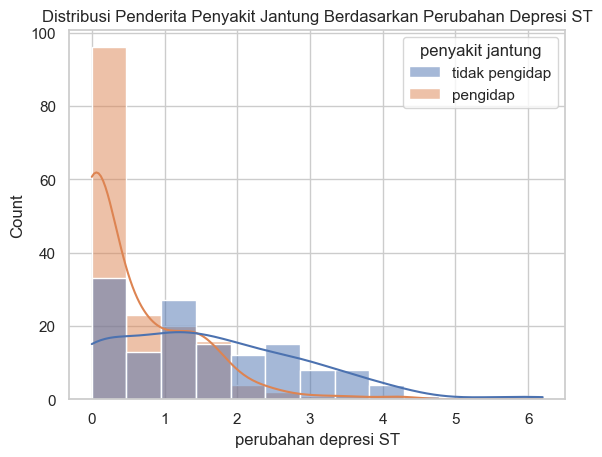

In [50]:
fig12 = sns.histplot(x = "perubahan depresi ST", data = oldpeak_target, hue = "penyakit jantung", kde=True)
# fig9.set_xticklabels(labels=["Tidak pengidap", "Pengidap"], rotation=0)
plt.title("Distribusi Penderita Penyakit Jantung Berdasarkan Perubahan Depresi ST");

Dari hasil yang didapatkan, ditemukan bahwa ternyata penderita penyakit jantung cenderung memiliki perubahan ST depresi yang rendah dibandingkan mereka yang memiliki perubahan ST depresi yang lebih tinggi. Hal ini dikarenakan perubahan ST depresi yang tinggi cenderung disebabkan karena iskemia akut yang dapat memperparah depresi ST. 

Sumber: https://ecgwaves.com/topic/ecg-st-segment-depression-ischemia-infarction-differential-diagnoses/

### 12. Distribusi Penderita Penyakit Jantung Berdasarkan Jumlah Pembuluh Darah Besar

Di sini saya ingin melihat apakah jumlah pembuluh darah besar yang terdeteksi melalui proses perwarnaan fluoroskopi mempengaruhi seseorang terkena penyakit jantung.

In [51]:
vessel_target = df1[["ca", "target"]].copy()
vessel_target["ca"] = vessel_target["ca"]
vessel_target["target"] = vessel_target["target"].replace({0: "tidak pengidap", 1: "pengidap"})

# Renaming columns
vessel_target.rename(columns={"ca": "jumlah pembuluh darah besar", "target": "penyakit jantung"}, inplace=True)

# Getting value counts and sorting index
result6 = vessel_target.value_counts().sort_index()
hasil6 = result6.reset_index(name="count")

# Displaying the result
print(tabulate(hasil6, headers="keys", tablefmt="pretty"))

+---+-----------------------------+------------------+-------+
|   | jumlah pembuluh darah besar | penyakit jantung | count |
+---+-----------------------------+------------------+-------+
| 0 |              0              |     pengidap     |  130  |
| 1 |              0              |  tidak pengidap  |  45   |
| 2 |              1              |     pengidap     |  21   |
| 3 |              1              |  tidak pengidap  |  44   |
| 4 |              2              |     pengidap     |   7   |
| 5 |              2              |  tidak pengidap  |  31   |
| 6 |              3              |     pengidap     |   3   |
| 7 |              3              |  tidak pengidap  |  17   |
| 8 |              4              |     pengidap     |   3   |
| 9 |              4              |  tidak pengidap  |   1   |
+---+-----------------------------+------------------+-------+


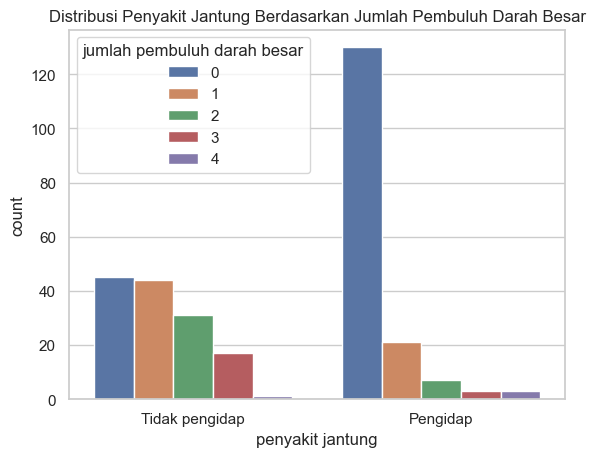

In [52]:
fig6 = sns.countplot(x = "penyakit jantung", data = vessel_target, hue = "jumlah pembuluh darah besar")
fig6.set_xticklabels(labels=["Tidak pengidap", "Pengidap"], rotation=0)
plt.title("Distribusi Penyakit Jantung Berdasarkan Jumlah Pembuluh Darah Besar");

Ditemukan bahwa pasien yang pembuluh darah besar tidak terdeteksi oleh proses perwarnaan fluoroskopi cenderung menderita penyakit jantung dengan persentase sebanyak 43%. Dapat dilihat juga dari grafik bahwa semakin sedikit jumlah pembuluh darah besar yang terdeteksi saat fluoroskopi, semakin tinggi pula jumlah kasus penyakit jantung. Pasien dengan karakteristik tersebut memiliki risiko terkena penyakit jantung sebanyak 74,3%.

Penyakit jantung dapat menyebabkan berbagai kerusakan pada pembuluh darah seperti kerusakan pada koroner, arteri perifer, dan aorta. Kerusakan-kerusakan terebut terjadi dikarenakan adanya penyumbatan atau berkurangnya aliran darah pada pembuluh darah yang terkena. Sehingga penyakit jantung tersebut dapat menyebabkan menurunkan kesehatan pembuluh darah besar. Selain itu kerusakan pada pembuluh darah juga dapat berpotensi pembuluh darah sulit atau tidak terdeteksi oleh fluoroskopi.  

Pembuluh darah besar mempunyai peran yang sangat penting dalam menjaga kesehatan tubuh. Dilansir dari situs clevelandclinic, pembuluh darah besar berperan dalam mengantarkan darah ke organ dan jaringan di tubuh. Selain itu pembuluh darah besar juga membawa produk limbah dan karbon dioksida keluar dari organ dan jaringan tubuh. Jadi dapat disimpulkan bahwa semakin sedikit pembuluh darah besar maka organ-organ seperti jantung akan sulit bekerja dengan baik sehingga berpotensi terkena penyakit.


sumber: 
- https://www.ncbi.nlm.nih.gov/books/NBK22227/
- https://my.clevelandclinic.org/health/body/21640-blood-vessels

### Kesimpulan

Jadi berdasarkan hasil penelitian di atas, ditemukan bahwa:
1. Generasi millenials mempunyai risiko terkena penyakit jantung tertinggi. Hal itu dikarenakan semakin muda suatu generasi, maka tingkat kepedulian terhadap kondisi kesehatan akan semakin rendah.
2. Pria lebih rentan terkena penyakit jantung dibandingkan wanita
3. Pasien dengan jenis nyeri dada non-anginal merupakan pengidap penyakit jantung terbanyak, sedangkan pasien dengan jenis nyeri dada atypical angina memiliki risiko terkena penyakit jantung tertinggi.
4. Pasien yang memiliki hipertensi 2 memiliki risiko terkena penyakit jantung paling tinggi
5. Pasien yang memiliki kadar kolesterol 200 sasmpai 240 mg/dl memiliki risiko terkena penyakit jantung tertinggi
6. Pasien yang memiliki kadar gula kurang dari 120 mg/dl memiliki risiko tertinggi terkena penyakit jantung 
7. Pasien yang memiliki kondisi EKG yang menunjukan adanya hipertrofi ventrikel kiri memiliki risiko terkena penyakit jantung tertinggi
8. Semakin tinggi detak jantung maksimum pasien makan akan semakin tinggi risiko terkena penyakit jantung
9. Pasien yang tidak merasakan nyeri dada saat sistolik memiliki risiko terkena penyakit jantung tertinggi
10. Pasien yang memiliki kondisi kemiringan ST jenis downsloping lebih rentan terkena penyakit jantung
11. Penderita penyakit jantung cenderung memiliki perubahan ST depresi yang rendah
12. Pasien yang tidak memiliki pembuluh darah besar baik karena rusak maupun tidak terdeteksi oleh fluoroskopi cenderung terkena penyakit jantung.


## Pre-Modelling

### Memasukan Kategori Umur, Tekanan Darah Diastolik, dan Kadar Kolesterol Dalam Dataframe

Pada bagian ini saya memasukan kolom age, trestbps, dan chol yang sudah dikategorikan pada bagian sebelumnya ke dalam dataframe yang asli.

In [53]:
generasi = age_target["generasi"].copy()
diastolik = diastolik_target["tekanan darah diastolik"].copy()
kolesterol = kolesterol_target["kadar kolesterol"].copy()

frames = [generasi, diastolik, kolesterol]
gdk = pd.concat(frames, axis = 1)

frames2 = [df1, gdk]
df2 = pd.concat(frames2, axis=1)
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,generasi,tekanan darah diastolik,kadar kolesterol
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2,3,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,3,3,2


### Splitting Dataset 

#### Memisahkan Variabel Dependen dengan Variabel Independen

Kolom akan dipecah menjadi variabel X (independen) dan variabel Y (dependen).

In [54]:
# Split between `X` (Features) and `y` (Target)
y = df2["target"]
X = df2.drop(["target"],axis=1)

### Feature Encoding

dikarenakan machine learning hanya bisa memproses variabel berjenis numerik, maka variabel kategorik akan ditransform menjadi variabel numerik.

In [55]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoder.fit(X)   

# Apply the encoder.
X = encoder.transform(X)

#### Memisahkan Data Menjadi Train dan Test

Di sini variabel independen dan variabel dependen akan pecah menjadi train dan test. Train akan digunakan untuk melatih model yang akan digunakan, sedangkan test akan digunakan dalam tahap pelatihan dan untuk membuat prediksi guna menguji keakuratan model. Rasio antara train dan test adalah sebesar 80:20 

In [56]:
# Splitting x and y into training and testing datasets
X_train,X_test,y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (241, 407)
Shape of X_test : (61, 407)
Shape of y_train : (241,)
Shape of y_test : (61,)


#### Feature Scaling

Dikarenakan semua kolom variabel memiliki ukuran atau skala yang berbeda, maka sebelum dilakukan modeling scaling terhadap semua kolom akan dilakukan. Sehingga semua kolom mempunyai skala yang sama.

In [57]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

Dataset heart disease ini menggunakan label data sehingga digunakanlah jenis algoritma supervised learning. Selain itu dikarenakan saya bertujuan untuk memprediksi target yang berjenis label atau kategori maka model algoritma yang digunakan adalah model algoritma klasifikasi. 
  
Saya bertujuan untuk memprediksi adanya penyakit jantung berdasarkan faktor-faktor yang sudah dianalisis sebelumnya. Sehingga saya akan menggunakan model algoritma klasifikasi yaitu Logistic Regression, K-nearest neighbors, Decision Tree, Random Forest, dan Support Vector Machine

### Logistic Regression

In [58]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
LRReport = classification_report(y_test, y_pred_LR)
LRScore = accuracy_score(y_test, y_pred_LR)
print(LRReport)
print(LRScore)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.73      0.83      0.77        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

0.7704918032786885


Hasil akurasi algoritma logistic regression adalah 0,7705, yang berarti bahwa algoritma logistic regression mampu memprediksi adanya penyakit jantung pada seseorang sebesar 77,05%.

#### Mencari Hyperparameter Terbaik Menggunakan GridSearchCV

In [59]:
param_grid_LR = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [100, 10, 1.0, 0.1, 0.01],
    "solver": ["liblinear", "saga", "lbfgs", "newton-cg", "liglinear"],
    "max_iter": [100, 1000, 2500, 5000]
}

grid_search_LR = GridSearchCV(LR, param_grid_LR, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_LR.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_LR.best_params_)
print('Best Accuracy: ', grid_search_LR.best_score_)

# get the best model
best_LR = grid_search_LR.best_estimator_

Best Parameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy:  0.8340136054421767


Hasil tuning menghasilkan bahwa hyperparameter algoritma logistic regression yang terbaik menggunakan ('C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'). Sedangkan hasil prediksi terbaik selepas dituning adalah sebesar 83,4%

In [60]:
y_pred_LR_tuned = grid_search_LR.predict(X_test)
LRScoreTuned = accuracy_score(y_test, y_pred_LR_tuned)
print(LRScoreTuned)

0.8524590163934426


Hasil akurasi algoritma logistic regression yang dituning adalah 0,8525. Hal itu berarti bahwa algoritma logistic regression yang sudah dituning mampu memprediksi adanya penyakit jantung pada seseorang sebesar 85,25%. Hasil mengalami peningkatan dibandingkan sebelum dilakukan hyperparameter tuning. 

#### Learning Curve

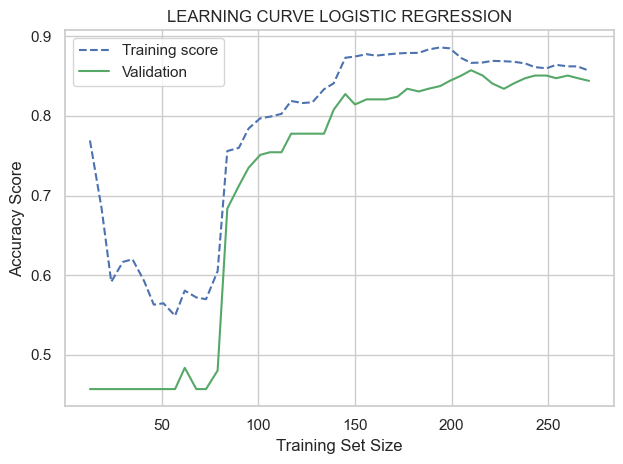

In [61]:
sizes, training_scores, testing_scores = learning_curve(best_LR, X, y, cv=10, scoring="accuracy", train_sizes=np.linspace(0.01, 1.0, 50)) 
  
# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, "--", color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Validation") 
  
# Drawing plot 
plt.title("LEARNING CURVE LOGISTIC REGRESSION") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

Dari hasil learning curve di atas didapatkan bahwa algoritma logistic regression yang sudah melakukan hyperparameter tuning mempunyai bentuk kurva yang menunjukan good fit. Kurva menunjukan bahwa semakin banyak jumlah sampel yang digunakan, maka ketepatan prediksi akan semakin meningkat.

### KNN (K-nearest neighbors)

In [62]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_score = KNN.score(X_test, y_test)
y_pred_KNN = KNN.predict(X_test)
KNNReport = classification_report(y_test, y_pred_KNN)
KNNScore = accuracy_score(y_test, y_pred_KNN)

print(KNNReport)
print(KNNScore)


              precision    recall  f1-score   support

           0       0.96      0.69      0.80        32
           1       0.74      0.97      0.84        29

    accuracy                           0.82        61
   macro avg       0.85      0.83      0.82        61
weighted avg       0.85      0.82      0.82        61

0.819672131147541


Hasil akurasi algoritma KNN adalah 0,8197. Hal itu berarti bahwa algoritma KNN mampu memprediksi adanya penyakit jantung pada seseorang sebesar 81,97%.

#### Mencari Nilai n_neighbors KNN yang terbaik

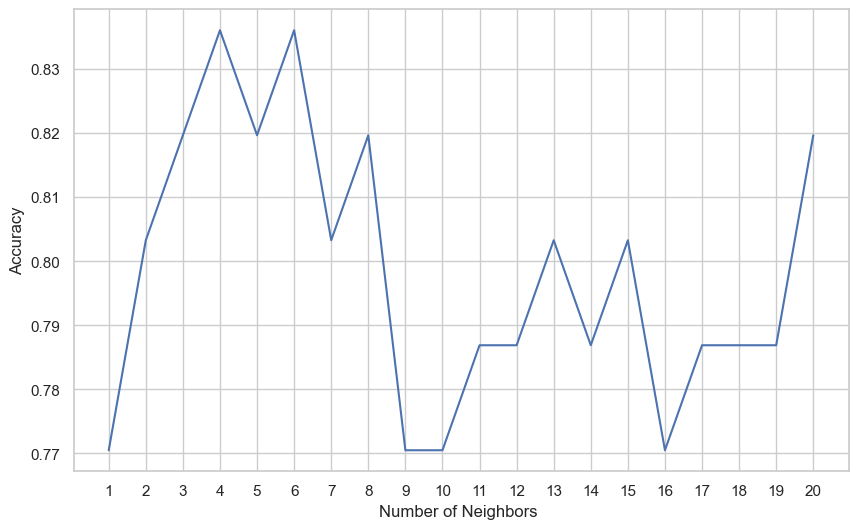

In [63]:
mean_acc = np.zeros(20)
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

Dari grafik didapatkan hasil bahwa 4 dan 6 merupakan nilai n_neighbors KNN yang mempunyai keakuratan tertinggi. Sehingga 4 dan 6 akan digunakan sebagai nilai hyperparameter tuning n_neighbors KNN.

#### Mencari Hyperparameter Terbaik Menggunakan GridSearchCV

In [64]:
param_grid_KNN = { 
    'n_neighbors' : [4,6],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

grid_search_KNN = GridSearchCV(KNN, param_grid_KNN, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_KNN.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_KNN.best_params_)
print('Best Accuracy: ', grid_search_KNN.best_score_)

# get the best model
best_KNN = grid_search_KNN.best_estimator_

Best Parameters:  {'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'uniform'}
Best Accuracy:  0.8295918367346939


Hasil tuning menghasilkan bahwa hyperparameter algoritma KNN yang terbaik menggunakan ('metric': 'minkowski', 'n_neighbors': 6, 'weights': 'uniform'). Sedangkan hasil prediksi terbaik selepas dituning adalah sebesar 82,96%. 

In [65]:
y_pred_KNN_tuned = grid_search_KNN.predict(X_test)
KNNScoreTuned = accuracy_score(y_test, y_pred_KNN_tuned)
print(KNNScoreTuned)

0.8360655737704918


Hasil akurasi algoritma KNN yang dituning adalah sebesar 0,8361. Hal itu berarti bahwa algoritma KNN yang sudah dituning mampu memprediksi adanya penyakit jantung pada seseorang sebesar 83,61%. Hasil hyperparameter tuning menunjukan peningkatan akurasi.

#### Learning Curve

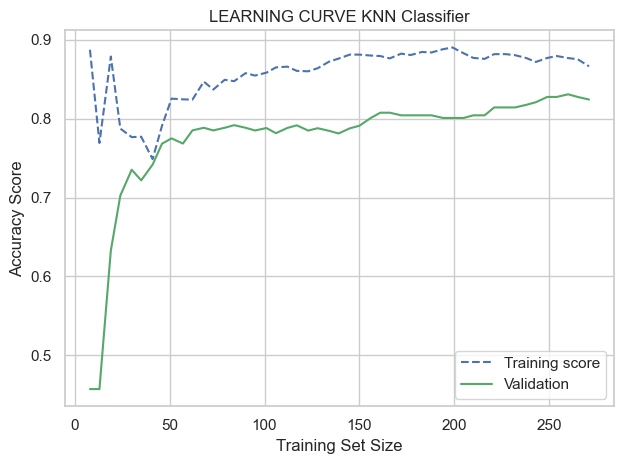

In [66]:
sizes, training_scores, testing_scores = learning_curve(best_KNN, X, y, cv=10, scoring="accuracy", train_sizes=np.linspace(0.01, 1.0, 50)) 
  
# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, "--", color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Validation") 
  
# Drawing plot 
plt.title("LEARNING CURVE KNN Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

Dari hasil learning curve algoritma KNN di atas didapatkan bahwa algoritma KNN yang sudah dilakukan hyperparameter tuning mempunyai bentuk kurva yang menunjukan good fit. Kurva menunjukan bahwa semakin banyak jumlah sampel yang digunakan, maka ketepatan prediksi akan semakin meningkat.

### Decision Tree

Decision tree atau model dengan klasifikasi dalam bentuk percabangan mempunyai kelemahan yaitu mempunyai algoritma greedy sup-optimal yang akan mengulang sampel secara acak beberapa kali. Oleh karena itu parameter random_state akan diterapkan untuk mengontrol pengambilan sampel decision tree sehingga hasil akurasi yang dihasilkan oleh decision tree akan konsisten.

sumber: https://scikit-learn.org/stable/modules/tree.html#tree

In [67]:
DCT = DecisionTreeClassifier(random_state=42)
DCT.fit(X_train, y_train)
y_pred_DCT = DCT.predict(X_test)
DCTReport = classification_report(y_test, y_pred_DCT)
DCTScore = accuracy_score(y_test, y_pred_DCT)
print(DCTReport)
print(DCTScore)

              precision    recall  f1-score   support

           0       0.75      0.66      0.70        32
           1       0.67      0.76      0.71        29

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.70        61

0.7049180327868853


Hasil akurasi algoritma decision tree bernilai 0,7049, yang berarti bahwa algoritma decision tree mampu memprediksi adanya penyakit jantung pada seseorang sebesar 70,49%.

#### Mencari Hyperparameter Terbaik Menggunakan GridSearchCV

In [68]:
param_grid_DCT = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search_DCT = GridSearchCV(DCT, param_grid_DCT, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_DCT.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_DCT.best_params_)
print('Best Accuracy: ', grid_search_DCT.best_score_)

# get the best model
best_DCT = grid_search_DCT.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy:  0.7633503401360544


Hasil tuning menghasilkan bahwa hyperparameter algoritma decision tree yang terbaik menggunakan ('criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'). Sedangkan hasil prediksi terbaik selepas dituning adalah sebesar 76,34%

In [69]:
y_pred_DCT_tuned = grid_search_DCT.predict(X_test)
DCTScoreTuned = accuracy_score(y_test, y_pred_DCT_tuned)
print(DCTScoreTuned)

0.8360655737704918


Hasil akurasi algoritma decision tree yang dituning adalah 0,8361. Hal itu berarti bahwa algoritma decision tree yang sudah dituning mampu memprediksi adanya penyakit jantung pada seseorang sebesar 83,61%. Tingkat akurasi mengalami peningkatan setelah dilakukan tuning.

#### Learning Curve

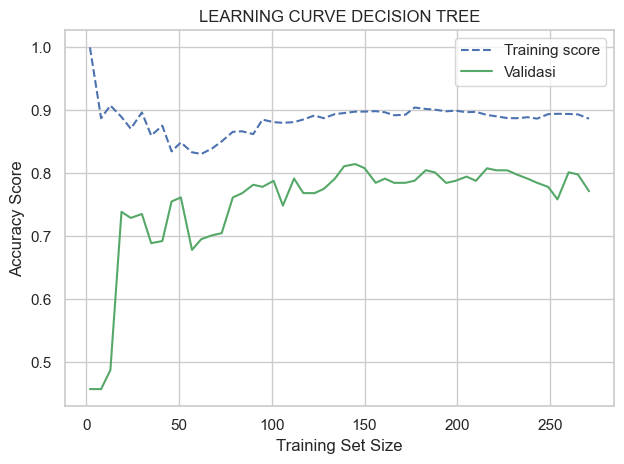

In [70]:
sizes, training_scores, testing_scores = learning_curve(best_DCT, X, y, cv=10, scoring="accuracy", train_sizes=np.linspace(0.01, 1.0, 50)) 
  
# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, "--", color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Validasi") 
  
# Drawing plot 
plt.title("LEARNING CURVE DECISION TREE") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

Dari hasil learning curve algoritma decision tree di atas didapatkan bahwa algoritma yang sudah dilakukan hyperparameter tuning mempunyai bentuk kurva yang menunjukan good fit. Kurva menunjukan bahwa semakin banyak jumlah sampel yang digunakan, maka ketepatan prediksi akan semakin meningkat.

### Random Forest

Dikarenakan random foreft merupakan model algoritma klasifikasi yang berjenis percabangan, maka parameter random_state akan diterapkan pada model.

In [71]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
RFReport = classification_report(y_test, y_pred_RF)
RFScore = accuracy_score(y_test, y_pred_RF)
print(RFReport)
print(RFScore)

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61

0.8032786885245902


Hasil akurasi algoritma random forest adalah 0,8033. Hal itu berarti bahwa algoritma random forest mampu memprediksi adanya penyakit jantung pada seseorang sebesar 80,33%.

#### Mencari Hyperparameter Terbaik Menggunakan GridSearchCV

In [72]:
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search_RF = GridSearchCV(RF, param_grid_RF, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_RF.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_RF.best_params_)
print('Best Accuracy: ', grid_search_RF.best_score_)

# get the best model
best_RF = grid_search_RF.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy:  0.8421768707482993


Hasil tuning menghasilkan bahwa hyperparameter algoritma random forest yang terbaik menggunakan ('criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300). Sedangkan hasil prediksi terbaik selepas dituning adalah sebesar 84,22%

In [73]:
y_pred_RF_tuned = grid_search_RF.predict(X_test)
RFScoreTuned = accuracy_score(y_test, y_pred_RF_tuned)
print(RFScoreTuned)

0.7868852459016393


Hasil akurasi algoritma random forest yang dituning adalah sebesar 0,7869. Hal itu berarti bahwa algoritma KNN yang sudah dituning mampu memprediksi adanya penyakit jantung pada seseorang sebesar 78,69%. Hasil tuning menunjukan penurunan akurasi.

#### Learning Curve

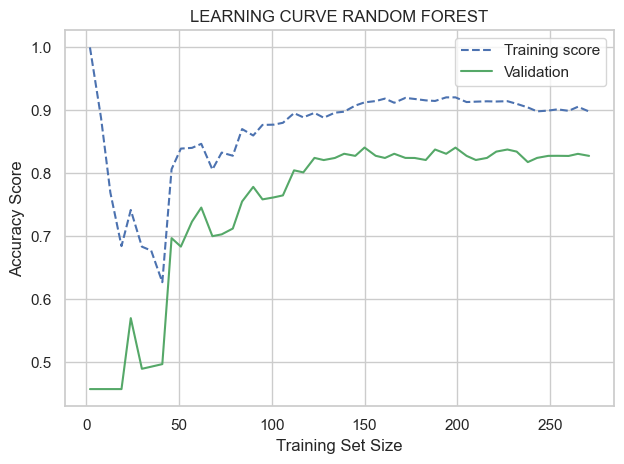

In [74]:
sizes, training_scores, testing_scores = learning_curve(best_RF, X, y, cv=10, scoring="accuracy", train_sizes=np.linspace(0.01, 1.0, 50)) 
  
# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, "--", color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Validation") 
  
# Drawing plot 
plt.title("LEARNING CURVE RANDOM FOREST") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

Dari hasil learning curve algoritma random forest di atas didapatkan bahwa algoritma yang sudah dilakukan hyperparameter tuning mempunyai bentuk kurva yang menunjukan good fit. Kurva menunjukan bahwa semakin banyak jumlah sampel yang digunakan, maka ketepatan prediksi akan semakin meningkat.

### SVM (Support Vector Machine)

In [75]:
SVM = SVC()
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)
SVMReport = classification_report(y_test, y_pred_DCT)
SVMScore = accuracy_score(y_test, y_pred_SVM)
print(SVMReport)
print(SVMScore)

              precision    recall  f1-score   support

           0       0.75      0.66      0.70        32
           1       0.67      0.76      0.71        29

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.70        61

0.7868852459016393


Hasil akurasi algoritma SVM adalah 0,7869. Hal itu berarti bahwa algoritma SVM mampu memprediksi adanya penyakit jantung pada seseorang sebesar 78,69%.

#### Mencari Hyperparameter Terbaik Menggunakan GridSearchCV

In [76]:
param_grid_SVM = {
    'C': [0.1, 1, 10, 100],                 
    'kernel': ['linear', 'rbf', 'poly'],    
    'gamma': ['scale', 'auto', 0.1, 1],     
    'degree': [2, 3, 4]                     
}

grid_search_SVM = GridSearchCV(SVM, param_grid_SVM, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_SVM.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_SVM.best_params_)
print('Best Accuracy: ', grid_search_SVM.best_score_)

# get the best model
best_SVM = grid_search_SVM.best_estimator_

Best Parameters:  {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best Accuracy:  0.8420918367346939


Hasil tuning menghasilkan bahwa hyperparameter algoritma SVM yang terbaik menggunakan ('C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'). Sedangkan hasil prediksi terbaik selepas dituning adalah sebesar 84,21%

In [77]:
y_pred_SVM_tuned = grid_search_SVM.predict(X_test)
SVMScoreTuned = accuracy_score(y_test, y_pred_SVM_tuned)
print(SVMScoreTuned)

0.8032786885245902


Hasil akurasi algoritma SVM yang dituning adalah sebesar 0,8033. Hal itu berarti bahwa algoritma KNN yang sudah dituning mampu memprediksi adanya penyakit jantung pada seseorang sebesar 80,33%. Hasil hyperparameter tuning mengalami peningkatan akurasi.

#### Learning Curve

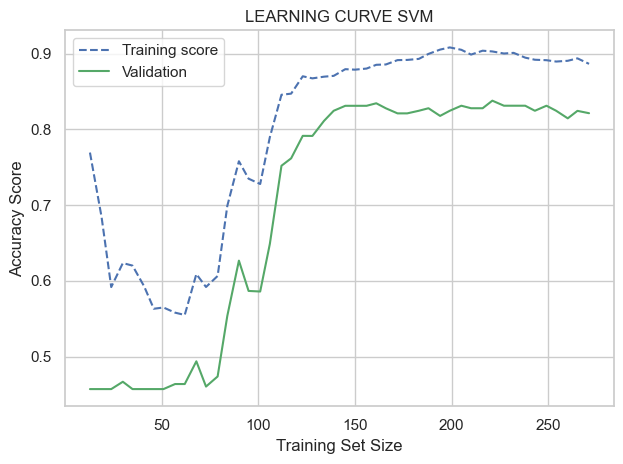

In [78]:
sizes, training_scores, testing_scores = learning_curve(best_SVM, X, y, cv=10, scoring="accuracy", train_sizes=np.linspace(0.01, 1.0, 50)) 
  
# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, "--", color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Validation") 
  
# Drawing plot 
plt.title("LEARNING CURVE SVM") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

Dari hasil learning curve algoritma SVM di atas didapatkan bahwa algoritma yang sudah dilakukan hyperparameter tuning mempunyai bentuk kurva yang menunjukan good fit. Kurva menunjukan bahwa semakin banyak jumlah sampel yang digunakan, maka ketepatan prediksi akan semakin meningkat.

## Model Evaluation

Untuk pemilihan model algoritma yang terbaik saya menggunakan metrik evaluasi akurasi. Hal terebut dikarenakan akurasi adalah metrik yang cocok digunakan pada data yang seimbang.

In [79]:
def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='weighted', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score']
    metricValue = [accuracy,precision,recall,fscore]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res

In [81]:
lr_summary = performance_evaluation(X_test,y_test,best_LR,'Logistic Regression')
knn_summary = performance_evaluation(X_test,y_test,best_KNN,'K Nearest Neigbors')
dct_summary = performance_evaluation(X_test,y_test,best_DCT,'Decision Tree')
rf_summary = performance_evaluation(X_test,y_test,best_RF,'Random Forest')
svm_summary = performance_evaluation(X_test,y_test,best_SVM,'Support Vector Machine')


# combine the summary of each model into a dataframe 
compare = pd.concat([lr_summary, knn_summary, dct_summary, rf_summary, svm_summary], axis=1)

# display the summary dafaframe
display(compare)


,Logistic Regression,K Nearest Neigbors,Decision Tree,Random Forest,Support Vector Machine
Accuracy,0.852459,0.836066,0.836066,0.786885,0.803279
Precision,0.863263,0.862502,0.850982,0.816765,0.827795
Recall,0.852459,0.836066,0.836066,0.786885,0.803279
F1_Score,0.852062,0.834291,0.835271,0.783762,0.801150


Dari hasil modelling yang juga sudah dilakukan hyperparameter tuning, didapatkan bahwa algoritma logistic regression merupakan algoritma terbaik untuk digunakan sebagai algoritma klasifikasi penyakit jantung berdasarkan dataset ini. Hasil tersebut dikarenakan model algoritma logistic regression mempunyai tingkat akurasi yang tertinggi dibandingkan empat model algoritma lainnya, yaitu sebesar 85,25%. 

## Kesimpulan

Pada bagian awal saya telah mengawali notebook ini dengan melakukan EDA. Hal tersebut bertujuan agar mendapatkan gambaran umum tentang data sebelum kita menjalankan model statistik atau algoritma machine learning. Dari hasil analisis korelasi diketahui bahwa terdapat empat variabel yang memiliki hubungan positif terhadap target yaitu cp, restecg, thalach, dan slope. Sedangkan terdapat sembilan variabel yang memiliki hubungan negatif terhadap target yaitu age, sex, trestbps, chol, bps, exang, oldpeak, ca, thal. Lalu saya ingin mengetahui risiko seseorang terkena penyakit jantung berdasarkan karakterisik yang dipunyainya. Dari hasil tersebut ditemukan beberapa faktor yang dapat memengaruhi risiko terkena penyakit jantung. Pertama, generasi milenial cenderung memiliki risiko tertinggi, hal tersebut dikarenakan kepedulian terhadap kondisi kesehatan di generasi yang lebih muda cenderung rendah. Selain itu, pria memiliki risiko lebih tinggi daripada wanita. Pasien dengan jenis nyeri dada non-anginal menjadi pengidap penyakit jantung terbanyak, sementara risiko tertinggi terjadi pada pasien dengan nyeri dada atypical angina. Hipertensi tingkat dua dan kadar kolesterol antara 200 hingga 240 mg/dL juga menjadi faktor risiko yang signifikan. Selain itu, kadar gula darah di bawah 120 mg/dL, kondisi hipertrofi ventrikel kiri, detak jantung maksimum yang tinggi, serta ketidaksensitifan terhadap nyeri dada saat sistolik juga berkontribusi pada risiko penyakit jantung. Kemiringan ST jenis downsloping juga meningkatkan risiko, sementara perubahan ST depresi yang rendah lebih umum terjadi pada penderita penyakit jantung. Terakhir, ketiadaan pembuluh darah besar, baik karena rusak atau tidak terdeteksi, juga dikaitkan dengan peningkatan risiko terkena penyakit jantung. Temuan ini menegaskan pentingnya pemahaman dan upaya pencegahan terhadap berbagai faktor risiko tersebut guna memitigasi munculnya penyakit jantung pada seseorang.






Untuk memprediksi atau memperkirakan keberadaan atau risiko terkena penyakit jantung pada seseorang, digunakanlah model machine learning. Model machine learning yang diterapkan digunakan sebagai untuk mengetahui apakah seseorang mempunyai atau memiliki risiko terkena penyakit jantung atau tidak. Model machine learning yang digunakan menggunakan algoritma klasifikasi. Model machine learning yang digunakan antara lain logistic regression, KNN (K-nearest neighbors), decision tree, random forest, dan SVM (Support Vector Machine). Dari hasil evaluasi model yang dilakukan ditemukan bahwa secara keseluruhan model algoritma yang digunakan memiliki hasil evaluasi yang bagus. Dari hasil learning curve tiap model, tidak ada satupun model yang mempunyai gejala underfit maupun overfit. Selain itu tingkat akurasi tiap model mempunyai hasil yang baik. Dari kelima model yang digunakan, algoritma logistic regression merupakan model algoritma terbaik dikarenakan mempunyai tingkat keakuratan tertinggi dibandingkan model machine learning lainnya. 

## Saving Model

In [85]:
with open("model.pkl", "wb") as file:
    pickle.dump(best_LR, file)